# Assignment 3 - Kaggle Competition

## Abstract


The goal of the assignment is to participate in kaggle competion and asses our ability against worldwide data scientist who are participating in kaggle competition. For this competion we selectd Homesite Quote Conversion dataset, which represents the activity of a large number of customers who are interested in buying policies from Homesite. In this competion our task is to predict whether customer is going to purchase insurance plan or not.

Since this is a classification proble we applied various model like `Logistic Regression`, `XGBoost` from XGB library and `XGBClassifier` from Sklearn wrapper class, `Gradient Boosting Machine (GBM)`, `H2O Automl` to get best model and `StackedEnsemble`.

We intially started off by applying Logistic Regression which gave better idea of our dataset and its behaviour.<br /> Then applied varios model and tuned there parameters to achieve best result. <br />

Little Introduction on AutoML:
AutoML: Automatic Machine Learning is developed by H2O.ai team which simply provide list of machine learning algorithms with best parameter with best auto-tunned values and provide values of evaluation matrics and many more.<br /> H2OAutoML is extreamly capable tool which provide variety of info on many machine learning algorithms and compute model that can give you better result in form of leaderboard.

## Acknowledgements

The Dataset is aquired from Kaggle competition at the website hosting the data is located at https://www.kaggle.com/c/homesite-quote-conversion/data.
The entire data is belong to `Homesite home insurance` which hosted this in kaggle competition.
Kernel Reference :https://www.kaggle.com/omarelgabry/homesite-customer-predictions

In [1]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

import xgboost as xgb
import statsmodels.api as sm

# For XGBoost SKLearn 2nd model
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
# from sklearn.grid_search import GridSearchCV   #Perforing grid search

# Importing H2O
import time, warnings, h2o, logging, os, sys, psutil, random
from h2o.automl import H2OAutoML

from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
# from __future__ import print_function

from h2o.estimators import H2OXGBoostEstimator

import warnings
warnings.filterwarnings('ignore')

In [457]:
# get homesite train & test csv files as a DataFrame
# homesite_df = pd.read_csv("C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//train.csv")
# test_df     = pd.read_csv("C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//test.csv")

homesite_df = pd.read_csv("train.csv")
test_df     = pd.read_csv("test.csv")

# preview the data
homesite_df.head()

QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  Field7  \
0            1          2013-08-16                     0      B      23   
1            2          2014-04-22                     0      F       7   
2            4          2014-08-25                     0      F       7   
3            6          2013-04-15                     0      J      10   
4            8          2014-01-25                     0      E      23   

   Field8  Field9 Field10  Field11 Field12        ...          \
0  0.9403  0.0006     965   1.0200       N        ...           
1  1.0006  0.0040     548   1.2433       N        ...           
2  1.0006  0.0040     548   1.2433       N        ...           
3  0.9769  0.0004   1,165   1.2665       N        ...           
4  0.9472  0.0006   1,487   1.3045       N        ...           

   GeographicField59A  GeographicField59B  GeographicField60A  \
0                   9                   9                  -1   
1                  10                  10                  -1   
2                  15                  18                  -1   
3                   6                   5                  -1   
4                  18                  22                  -1   

   GeographicField60B  GeographicField61A  GeographicField61B  \
0                   8                  -1                  18   
1                  11                  -1                  17   
2                  21                  -1                  11   
3                  10                  -1                   9   
4                  10                  -1                  11   

   GeographicField62A  GeographicField62B  GeographicField63  \
0                  -1                  10                  N   
1                  -1                  20                  N   
2                  -1                   8                  N   
3                  -1                  21                  N   
4                  -1                  12                  N   

   GeographicField64  
0                 CA  
1                 NJ  
2                 NJ  
3                 TX  
4                 IL  

[5 rows x 299 columns]

In [458]:
homesite_df.describe()

QuoteNumber  QuoteConversion_Flag         Field7         Field8  \
count  260753.000000         260753.000000  260753.000000  260753.000000   
mean   217201.246011              0.187511      18.293339       0.938346   
std    125478.522633              0.390322       7.382803       0.037086   
min         1.000000              0.000000       1.000000       0.874600   
25%    108517.000000              0.000000      11.000000       0.915300   
50%    217012.000000              0.000000      23.000000       0.940300   
75%    325905.000000              0.000000      24.000000       0.968500   
max    434588.000000              1.000000      28.000000       1.010100   

              Field9        Field11  CoverageField1A  CoverageField1B  \
count  260753.000000  260753.000000    260753.000000    260753.000000   
mean        0.001451       1.162718         9.012533        13.000403   
std         0.001486       0.116833         5.576509         7.219264   
min         0.000400       1.000000        -1.000000        -1.000000   
25%         0.000600       1.020000         5.000000         7.000000   
50%         0.000600       1.188600         8.000000        13.000000   
75%         0.003800       1.266500        12.000000        19.000000   
max         0.004000       1.304500        25.000000        25.000000   

       CoverageField2A  CoverageField2B         ...          \
count    260753.000000    260753.000000         ...           
mean          9.054005        13.015240         ...           
std           5.560521         7.211717         ...           
min           1.000000         1.000000         ...           
25%           5.000000         7.000000         ...           
50%           8.000000        13.000000         ...           
75%          12.000000        19.000000         ...           
max          25.000000        25.000000         ...           

       GeographicField58A  GeographicField58B  GeographicField59A  \
count       260753.000000       260753.000000       260753.000000   
mean            11.567756           12.985695           11.694903   
std              5.448425            7.216091            5.626092   
min             -1.000000           -1.000000           -1.000000   
25%              8.000000            7.000000            7.000000   
50%             11.000000           13.000000           11.000000   
75%             15.000000           19.000000           15.000000   
max             25.000000           25.000000           25.000000   

       GeographicField59B  GeographicField60A  GeographicField60B  \
count       260753.000000       260753.000000       260753.000000   
mean            13.049882           -0.350481           12.994362   
std              7.213636            4.057792            7.219943   
min             -1.000000           -1.000000           -1.000000   
25%              7.000000           -1.000000            7.000000   
50%             13.000000           -1.000000           13.000000   
75%             19.000000           -1.000000           19.000000   
max             25.000000           25.000000           25.000000   

       GeographicField61A  GeographicField61B  GeographicField62A  \
count       260753.000000       260753.000000       260753.000000   
mean            -0.343601           13.042734           -0.341009   
std              4.078673            7.145248            4.086511   
min             -1.000000           -1.000000           -1.000000   
25%             -1.000000            7.000000           -1.000000   
50%             -1.000000           13.000000           -1.000000   
75%             -1.000000           19.000000           -1.000000   
max             25.000000           25.000000           25.000000   

       GeographicField62B  
count       260753.000000  
mean            14.122948  
std              5.829091  
min             -1.000000  
25%              8.000000  
50%             13.000000  
75%             19.000000  
max     

### Feature Engineering:

In [459]:
homesite_df = homesite_df.drop(['QuoteNumber'], axis=1)

- drop unnecessary columns, these columns won't be useful in analysis and prediction

In [460]:
# date
homesite_df['Year']  = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[:4]))
homesite_df['Month'] = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[5:7]))
homesite_df['Week']  = homesite_df['Original_Quote_Date'].apply(lambda x: int(str(x)[8:10]))

test_df['Year']  = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[5:7]))
test_df['Week']  = test_df['Original_Quote_Date'].apply(lambda x: int(str(x)[8:10]))

homesite_df.drop(['Original_Quote_Date'], axis=1,inplace=True)
test_df.drop(['Original_Quote_Date'], axis=1,inplace=True)

- Convert Date to Year, Month, and Week for better understanding of data and processing
- We are converting date in both dataset to maintain consistancy and accuracy of dataset
- We are droping out `Original_Quote_Date` to avoid correlation between columns.

In [461]:
print('------------------Train Data-------------------')
for column in homesite_df:
    if homesite_df[column].isnull().any()==True:
        count=homesite_df[column].isnull().sum()
        print('column Name: ',column,'\t Sum: ',count )

print()
print('------------------Test Data--------------------')
for column in test_df:
    if test_df[column].isnull().any()==True:
        count=test_df[column].isnull().sum()
        print('column Name: ',column,'\t Sum: ',count )

------------------Train Data-------------------
column Name:  PersonalField7 	 Sum:  113
column Name:  PersonalField84 	 Sum:  124208
column Name:  PropertyField3 	 Sum:  81
column Name:  PropertyField4 	 Sum:  63
column Name:  PropertyField29 	 Sum:  200685
column Name:  PropertyField32 	 Sum:  70
column Name:  PropertyField34 	 Sum:  70
column Name:  PropertyField36 	 Sum:  113
column Name:  PropertyField38 	 Sum:  1220

------------------Test Data--------------------
column Name:  PersonalField7 	 Sum:  69
column Name:  PersonalField84 	 Sum:  82812
column Name:  PropertyField3 	 Sum:  69
column Name:  PropertyField4 	 Sum:  52
column Name:  PropertyField5 	 Sum:  1
column Name:  PropertyField29 	 Sum:  133945
column Name:  PropertyField30 	 Sum:  1
column Name:  PropertyField32 	 Sum:  41
column Name:  PropertyField34 	 Sum:  41
column Name:  PropertyField36 	 Sum:  67
column Name:  PropertyField38 	 Sum:  846


#### There are some columns with non-numerical values(i.e. dtype='object'),

In [462]:
from sklearn import preprocessing

for f in homesite_df.columns:
    if homesite_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(homesite_df[f].values) + list(test_df[f].values)))
        homesite_df[f] = lbl.transform(list(homesite_df[f].values))
        test_df[f] = lbl.transform(list(test_df[f].values))

- So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

In [463]:
# fill NaN values
homesite_df.fillna(-1, inplace=True)
test_df.fillna(-1, inplace=True)

- Since we are dealing with finacial dataset, taking precautionary measures are importatnt
- As a safe check we are replacing null values with -1, since we are going to do binary classification 0 can hold predictive power 

In [464]:
homesite_df.info()
print("---------------------------------------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 300 entries, QuoteConversion_Flag to Week
dtypes: float64(6), int64(294)
memory usage: 596.8 MB
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Columns: 300 entries, QuoteNumber to Week
dtypes: float64(6), int64(294)
memory usage: 397.9 MB


- Test dataset have `260753` rows and `300` charecteristics of total size `596.8` MB
- Train dataset have `173836` rows and `300` charecteristics of total size `397.9` MB

### Exploring our features

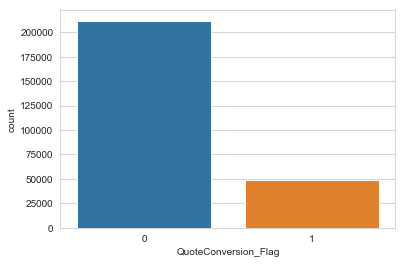

In [368]:
# customers purchased insurance plan
sns.countplot(x="QuoteConversion_Flag", data=homesite_df)

In [369]:
homesite_df['QuoteConversion_Flag'].value_counts()

0    211859
1     48894
Name: QuoteConversion_Flag, dtype: int64

- There are 211859 instances of 1's (i.e Customer Purchasing insurance plan) and 48894 instances of 0's

#### Lets check in which year has higher number of customers purchased insurance plan

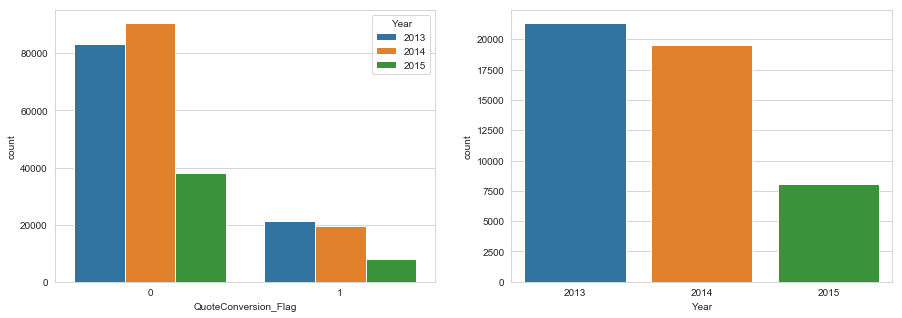

In [370]:
# Plot
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x="QuoteConversion_Flag",hue="Year", data=homesite_df, ax=axis1)
sns.countplot(x=homesite_df["Year"].loc[homesite_df["QuoteConversion_Flag"] == 1], 
              order=[2013,2014,2015], ax=axis2)

- Year 2013 has higher number of customers purchased insurance plan

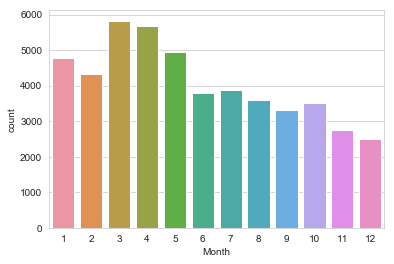

In [371]:
# Plot
sns.countplot(x=homesite_df["Month"].loc[homesite_df["QuoteConversion_Flag"] == 1], 
              order=[1,2,3,4,5,6,7,8,9,10,11,12])

- The 3rd month followed by 4th moth has higher number of customers purchased insurance plan

### Plotting Correlation Matrix

In [372]:
X_train.corr()

Field6    Field7    Field8    Field9   Field10  \
Field6              1.000000 -0.326260  0.097346  0.300889 -0.849921   
Field7             -0.326260  1.000000 -0.436411 -0.572369  0.046250   
Field8              0.097346 -0.436411  1.000000  0.710963  0.276233   
Field9              0.300889 -0.572369  0.710963  1.000000  0.181509   
Field10            -0.849921  0.046250  0.276233  0.181509  1.000000   
Field11             0.846145 -0.256320  0.127229  0.144041 -0.854416   
Field12             0.233043  0.076278 -0.366945 -0.186310 -0.341968   
CoverageField1A    -0.068719  0.047157 -0.018017 -0.024764  0.061886   
CoverageField1B    -0.083415  0.044923 -0.008386 -0.013950  0.083769   
CoverageField2A    -0.066890  0.045087 -0.018319 -0.023559  0.060818   
CoverageField2B    -0.081536  0.042424 -0.008816 -0.012915  0.082558   
CoverageField3A    -0.086113  0.001922  0.033315  0.035913  0.105507   
CoverageField3B    -0.097927 -0.001174  0.043100  0.046442  0.124371   
CoverageField4A    -0.009974  0.063868 -0.103657 -0.067522 -0.021891   
CoverageField4B    -0.031214  0.062157 -0.089984 -0.056088  0.006619   
CoverageField5A    -0.028831 -0.042595  0.083897  0.110560  0.085249   
CoverageField5B    -0.026956 -0.005215  0.069055  0.089464  0.073220   
CoverageField6A     0.084058 -0.004488 -0.022354 -0.019817 -0.095603   
CoverageField6B     0.112577  0.050475 -0.065180 -0.072002 -0.151044   
CoverageField8     -0.056476  0.015267 -0.133714 -0.014314  0.013234   
CoverageField9      0.187774 -0.033585 -0.040279 -0.021973 -0.206529   
CoverageField11A    0.020370 -0.005461 -0.097156 -0.059963 -0.068292   
CoverageField11B    0.013119 -0.013626 -0.095915 -0.036313 -0.055417   
SalesField1A        0.453671  0.105655 -0.239269 -0.255578 -0.583152   
SalesField1B        0.470331  0.085459 -0.214457 -0.239583 -0.591544   
SalesField2A        0.475433  0.083989 -0.230209 -0.248580 -0.605597   
SalesField2B        0.536981  0.041572 -0.201369 -0.220232 -0.654179   
SalesField3         0.078774 -0.022992 -0.016236  0.026770 -0.080667   
SalesField4         0.065902  0.097955 -0.081396 -0.102968 -0.108521   
SalesField5         0.110247  0.146864 -0.162230 -0.201678 -0.212620   
...                      ...       ...       ...       ...       ...   
GeographicField50B  0.186329 -0.120112  0.109065  0.189192 -0.079988   
GeographicField51A -0.002640  0.001064 -0.014550 -0.025035 -0.015569   
GeographicField51B  0.000873 -0.000055 -0.013116 -0.022642 -0.018052   
GeographicField52A  0.023923 -0.007511 -0.012442 -0.019356 -0.039984   
GeographicField52B  0.027452 -0.011271 -0.008026 -0.013399 -0.040886   
GeographicField53A  0.182943 -0.055162 -0.003278  0.014807 -0.180378   
GeographicField53B  0.197344 -0.070191  0.013986  0.037538 -0.185284   
GeographicField54A -0.452665  0.197722 -0.086746 -0.179651  0.381947   
GeographicField54B -0.470692  0.217678 -0.105721 -0.206152  0.388719   
GeographicField55A -0.342821  0.113164 -0.014723 -0.067044  0.321395   
GeographicField55B -0.336619  0.117692 -0.025159 -0.074769  0.312466   
GeographicField56A -0.092170  0.057585 -0.042820 -0.068923  0.061852   
GeographicField56B -0.258052  0.211673 -0.182526 -0.261298  0.148333   
GeographicField57A -0.032219  0.038254 -0.041196 -0.058461  0.005206   
GeographicField57B -0.032649  0.037996 -0.040559 -0.057855  0.005671   
GeographicField58A -0.095207  0.056158 -0.048556 -0.074914  0.061196   
GeographicField58B -0.096078  0.055686 -0.047126 -0.073524  0.063140   
GeographicField59A -0.018001 -0.123446  0.173892  0.206482  0.111845   
GeographicField59B -0.013825 -0.138638  0.192334  0.230587  0.118765   
GeographicField60A -0.008149 -0.019610  0.039526  0.042067  0.029836   
GeographicField60B  0.038479 -0.071154  0.080491  0.105938  0.014012   
GeographicField61A -0.066561  0.024822 -0.005744 -0.021204  0.055869   
GeographicField61B -0.224544  0.024157  0.050124  0.025639  0.236615   
GeographicField62A -0.006568  0.032390 -0.034117 -0.048947 -0.

#### Since our dataset have more than 300 features, analysing correlation in single chart is bothersome.
Here we will display correlation heatmsp in set of 30 features in each.

Plot Number:  1


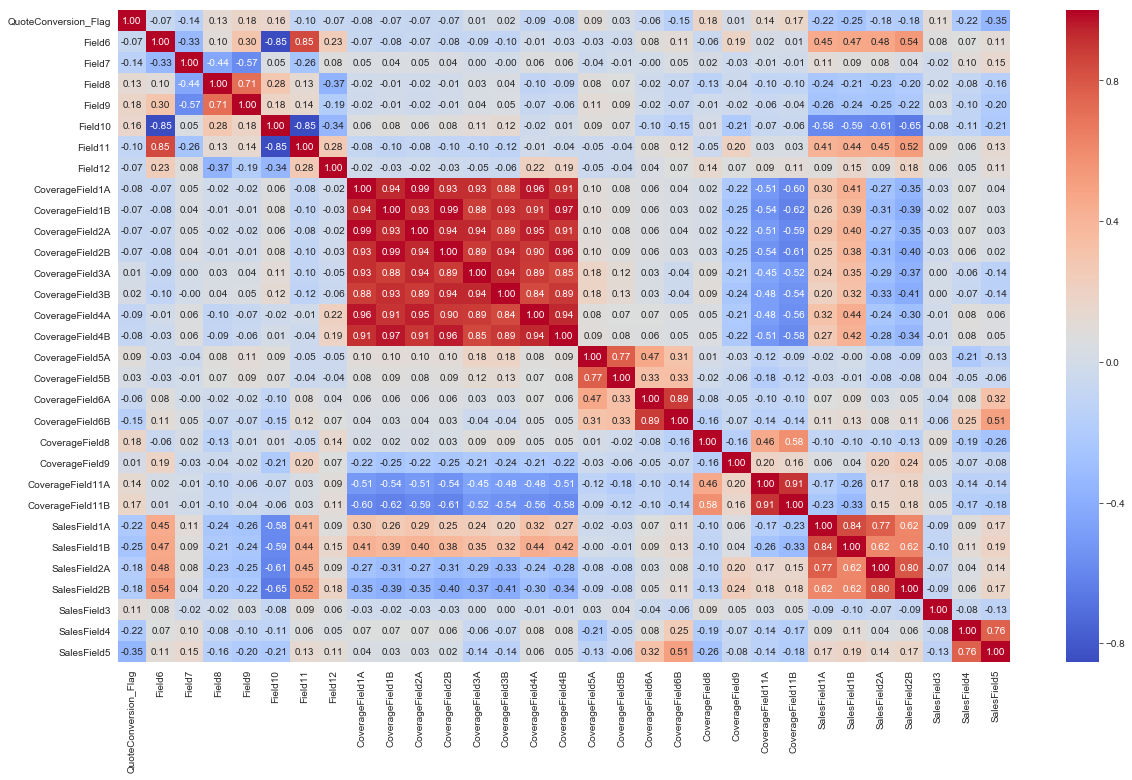

Plot Number:  2


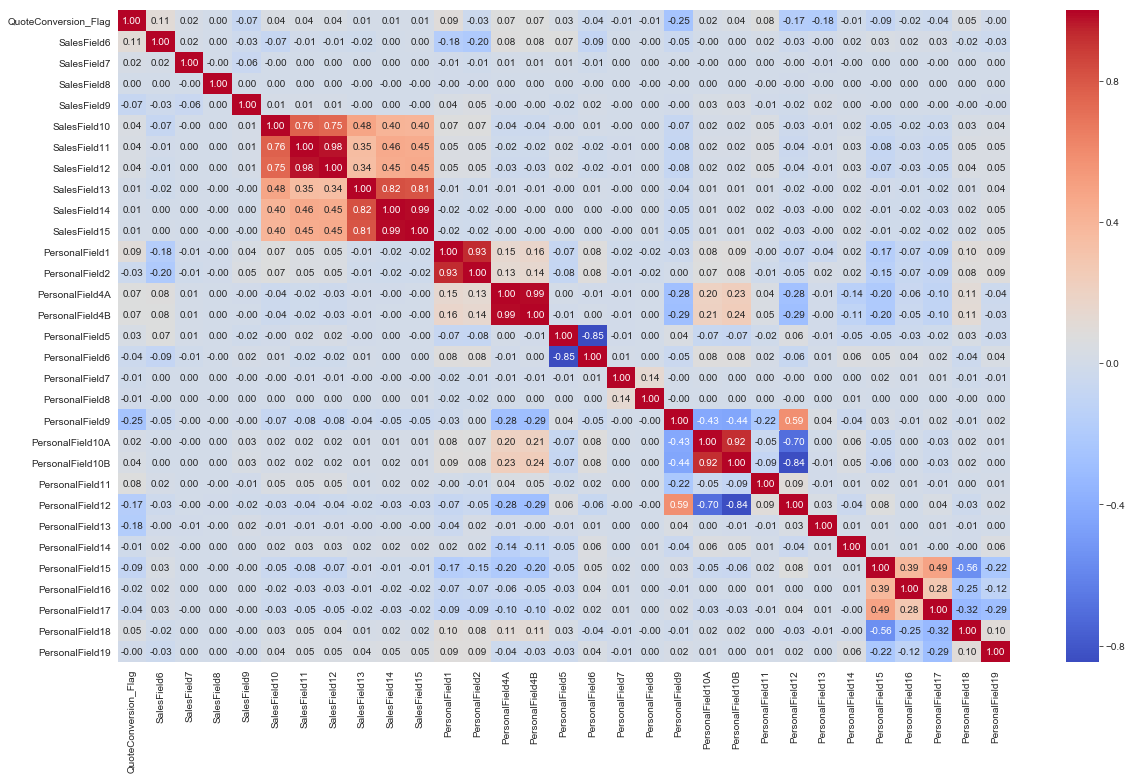

Plot Number:  3


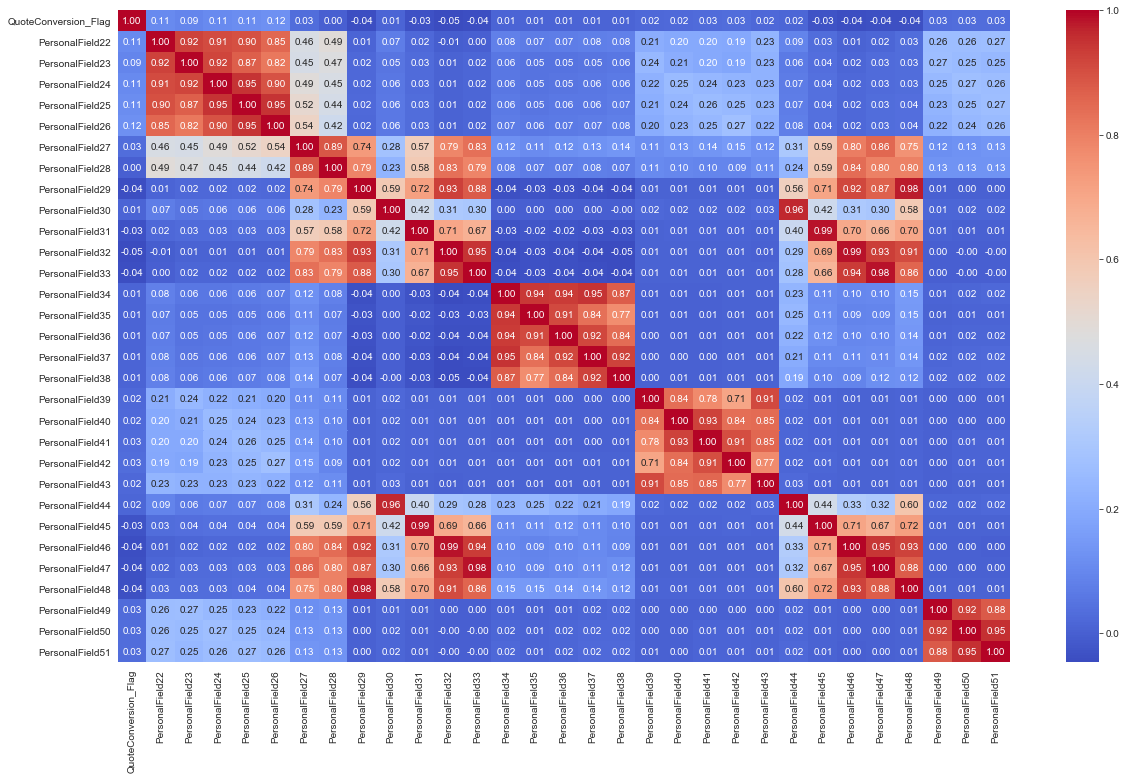

Plot Number:  4


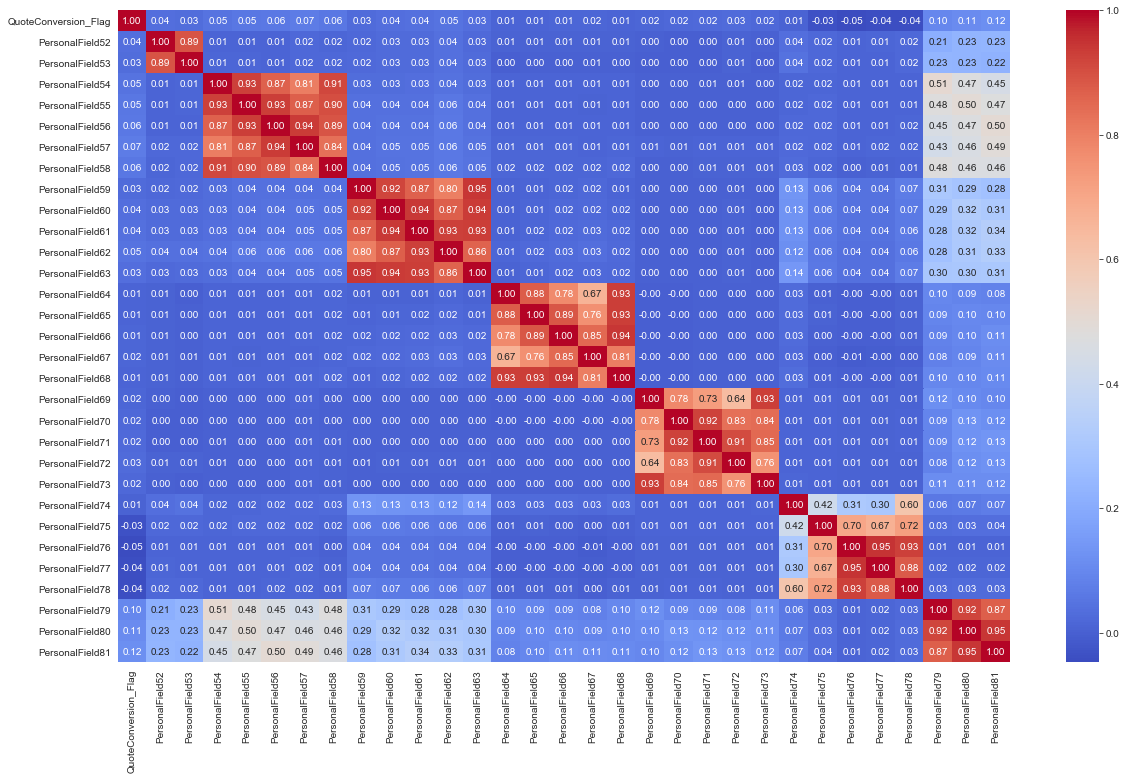

Plot Number:  5


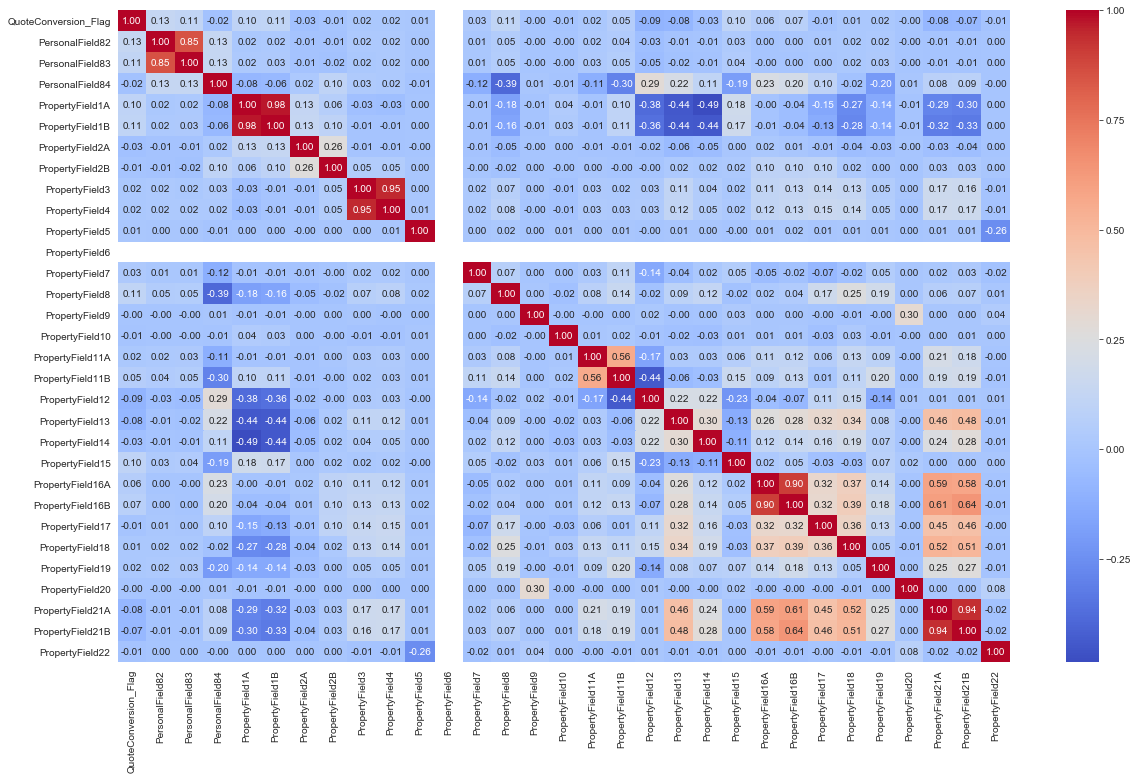

Plot Number:  6


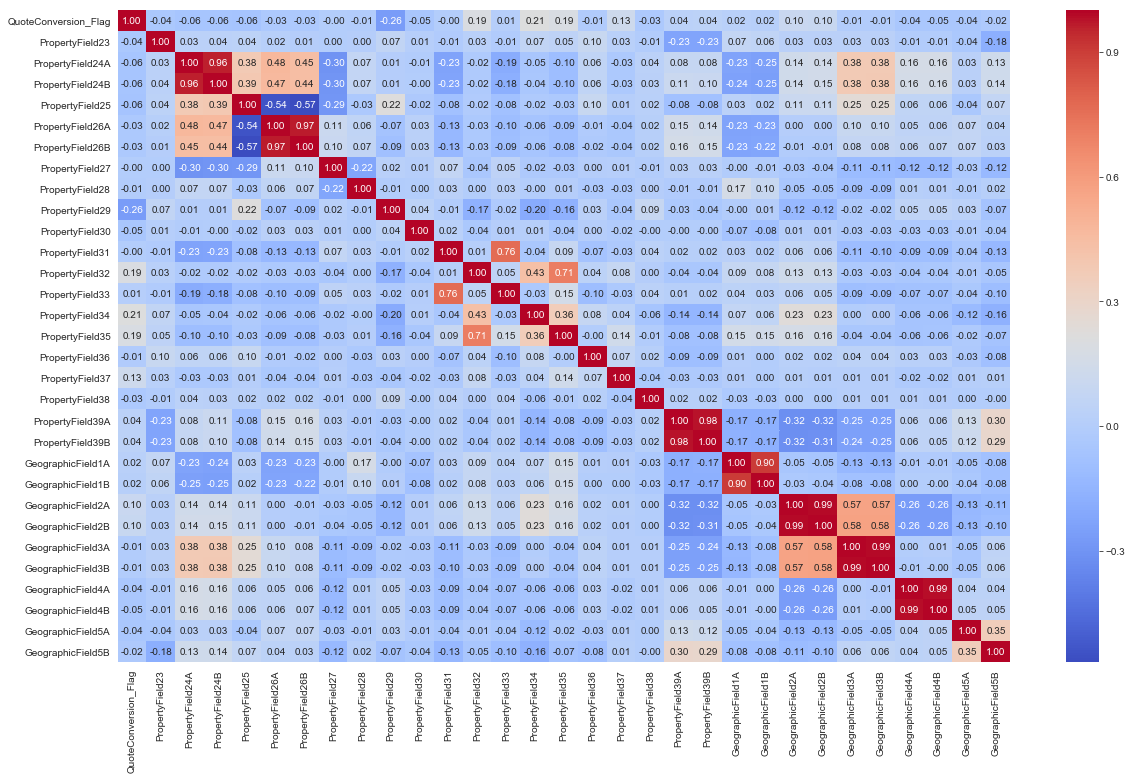

Plot Number:  7


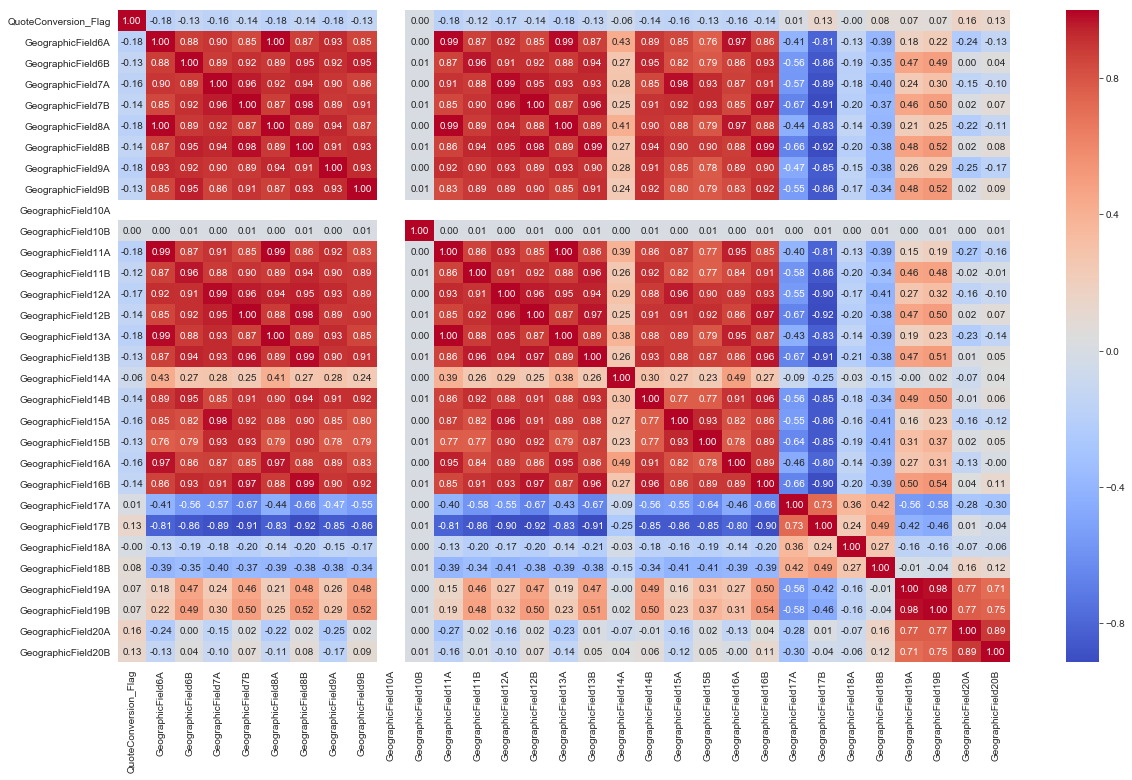

Plot Number:  8


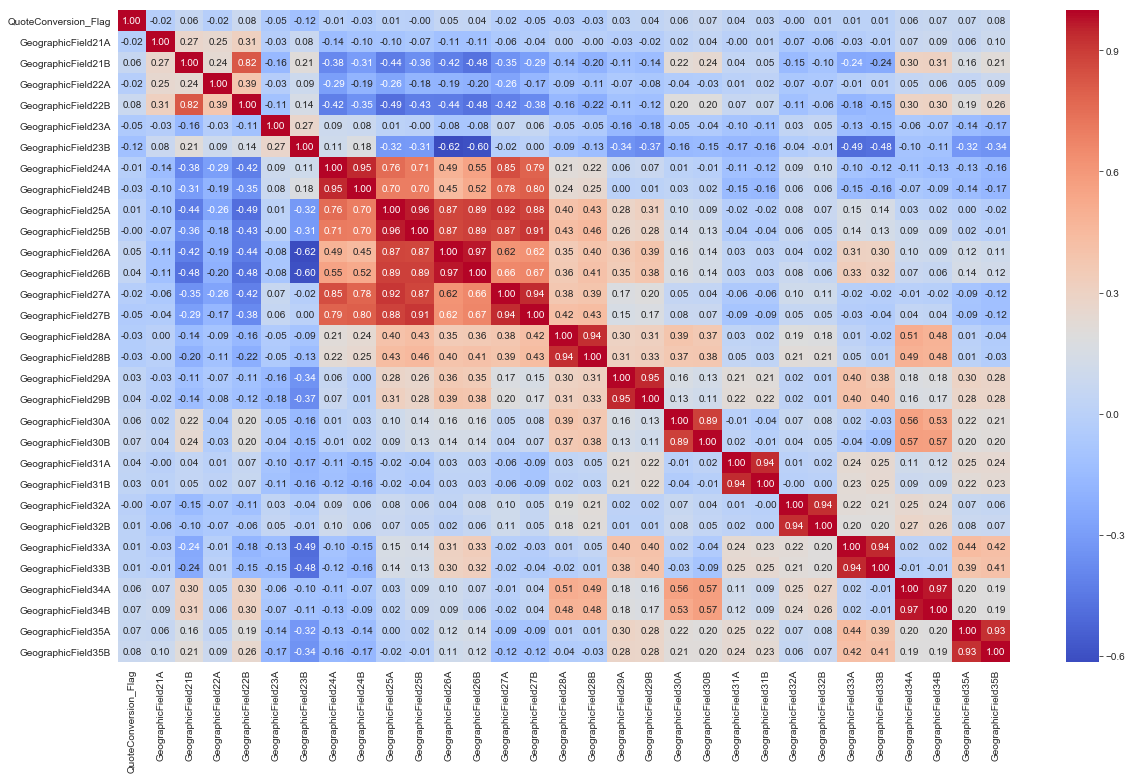

Plot Number:  9


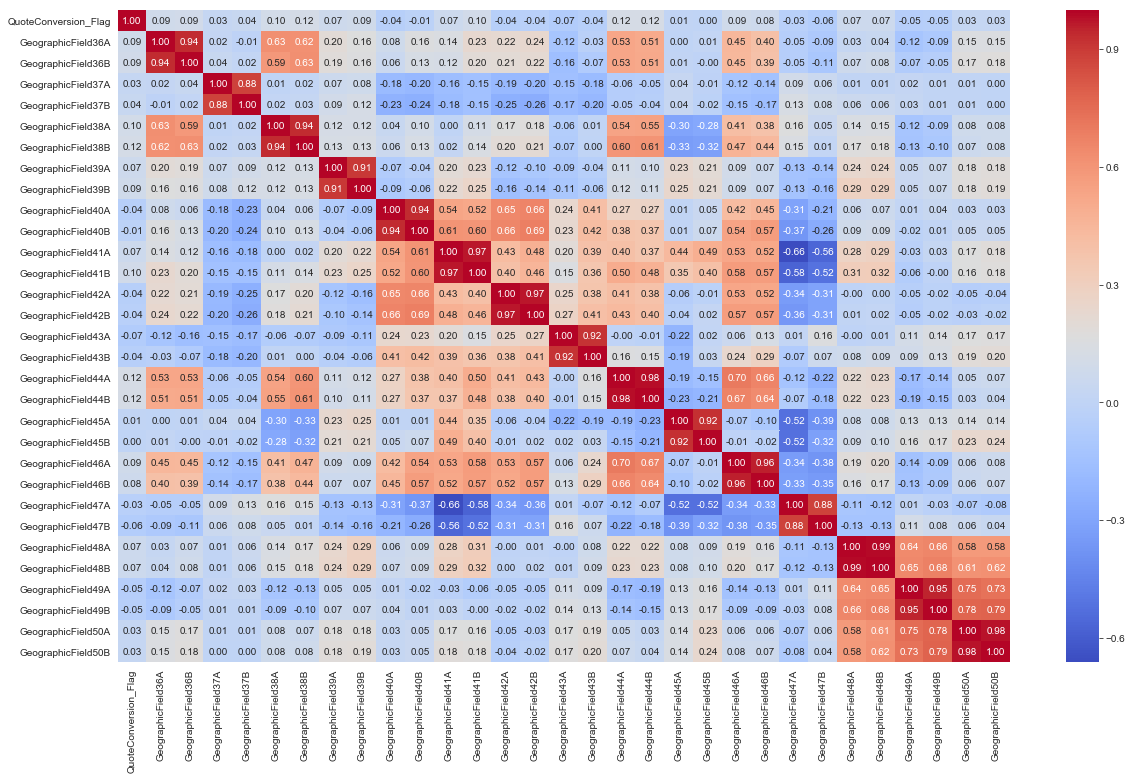

In [373]:
counter=0
plt_cnt=0
for columns in X_train:
    if counter == 0:
        df_heat= pd.DataFrame(homesite_df["QuoteConversion_Flag"])
        plt_cnt=plt_cnt+1
    if counter<30:
        counter=counter+1
        df_heat[columns]= + homesite_df[columns]
    if counter==30:
        print("Plot Number: " , plt_cnt)
        plt.figure(figsize=(20,12))
        sns.heatmap(data=df_heat.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
        plt.show()
        counter=0
        df_heat=df_heat.iloc[0:0]

## Data Modeling:

## Logistic Regression Model

#### Since we are doing binary classification starting off with Logistic Regression is better choice. It will give better understanding of our dataset and its charecteristics

In [442]:
logReg = LogisticRegression(random_state=0)

In [443]:
ylog= homesite_df["QuoteConversion_Flag"]
xlog = homesite_df.drop("QuoteConversion_Flag",axis=1)

In [444]:
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(xlog,ylog,test_size=0.2)

- Splitting our train dataset to train our model and to check its accuracy

In [445]:
print (Xlog_train.shape, ylog_train.shape)
print (Xlog_test.shape, ylog_test.shape)

(208602, 299) (208602,)
(52151, 299) (52151,)


In [446]:
# Predicting the test set results and creating confusion matrix
results_logistic = logReg.fit(Xlog_train, ylog_train)
print (results_logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [447]:
ylog_pred = logReg.predict(Xlog_test)
ylog_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [448]:
np.array(ylog_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [449]:
# Predicting the test set results and creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ylog_test, ylog_pred)
print(confusion_matrix)

[[40880  1539]
 [ 5640  4092]]


In [450]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(Xlog_test, ylog_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [451]:
from sklearn.metrics import classification_report
print(classification_report(ylog_test, ylog_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     42419
           1       0.73      0.42      0.53      9732

   micro avg       0.86      0.86      0.86     52151
   macro avg       0.80      0.69      0.73     52151
weighted avg       0.85      0.86      0.85     52151



In [452]:
# summary_log = sm.Logit(ylog, xlog).fit()
# summary_log.summary()

In [453]:
logReg.predict_proba(Xlog_train)

array([[0.75930923, 0.24069077],
       [0.63187332, 0.36812668],
       [0.88553614, 0.11446386],
       ...,
       [0.77902127, 0.22097873],
       [0.3115503 , 0.6884497 ],
       [0.83308812, 0.16691188]])

In [454]:
logReg.predict_proba(Xlog_test)

array([[0.8688012 , 0.1311988 ],
       [0.52408997, 0.47591003],
       [0.98447871, 0.01552129],
       ...,
       [0.86832535, 0.13167465],
       [0.96688339, 0.03311661],
       [0.93014278, 0.06985722]])

- Lets check Receiver operating characteristic of split test data

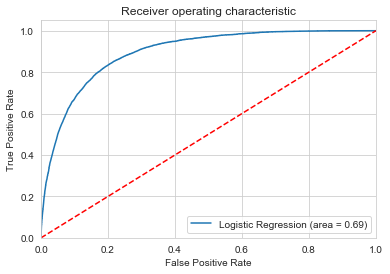

In [455]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ylog_test, logReg.predict(Xlog_test))
fpr, tpr, thresholds = roc_curve(ylog_test, logReg.predict_proba(Xlog_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## XGBoost Model

#### Boosting : Algorithm allowing to fit many weak classifiers to re-weighted version of training data. It classify final example by majority voting.

### XGB - Model 1

#### XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.
#### When using boosting techniques all instances in dataset assign a score telling how difficult to claasify they are. In each iteration algorithm pays more attension (i.e assign bigger weights) to the instances which are wrongly classified previously. 

In [375]:
# define training and testing sets

X_train = homesite_df.drop("QuoteConversion_Flag",axis=1)
Y_train = homesite_df["QuoteConversion_Flag"]
X_test  = test_df.drop("QuoteNumber",axis=1).copy()

In [376]:
# Xgboost 

params = {"objective": "binary:logistic"}

T_train_xgb = xgb.DMatrix(X_train, Y_train)
X_test_xgb  = xgb.DMatrix(X_test)

- Params are charateristic that you feed to your model while training.

In [377]:
Xgbm = xgb.train(params, T_train_xgb, 50)

In [378]:
Y_pred = Xgbm.predict(X_test_xgb)

In [379]:
Y_pred.shape

(173836,)

- Saving ouput in file

In [380]:
df1=pd.DataFrame([test_df.QuoteNumber,np.array(Y_pred)])

In [381]:
df1

0         1         2         3          4         5       \
QuoteNumber  3.000000  5.000000  7.000000  9.000000  10.000000  11.00000   
Unnamed 0    0.000954  0.043803  0.028649  0.011978   0.172735   0.02068   

                6          7          8          9           ...        \
QuoteNumber  15.000000  16.000000  17.000000  21.000000      ...         
Unnamed 0     0.000309   0.030526   0.000091   0.000091      ...         

                   173826         173827         173828         173829  \
QuoteNumber  434554.00000  434558.000000  434560.000000  434563.000000   
Unnamed 0         0.04863       0.000295       0.000112       0.997603   

                    173830         173831        173832         173833  \
QuoteNumber  434565.000000  434570.000000  434573.00000  434574.000000   
Unnamed 0         0.269801       0.179167       0.21999       0.998138   

                    173834         173835  
QuoteNumber  434575.000000  434589.000000  
Unnamed 0         0.000472       0.202322  

[2 rows x 173836 columns]

In [382]:
# df_output=df1.T
# df_output.to_csv(r'C://Users//kaila//OneDrive//Desktop//DSMT//XGBoostTest5.csv')

In [383]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = Y_pred

In [385]:
subfile = 'prediction_XGB.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: prediction_XGB.csv


### XGB - Model 2

#### In our 2nd model we will use XGBoost from SKLearn wrapper.
Advantage of doing so is, Sklearn provide Cross Validation folds to split and variefy our model

In [386]:
X_train = homesite_df
Y_train = homesite_df["QuoteConversion_Flag"]
X_test  = test_df.drop("QuoteNumber",axis=1).copy()
# Y_test  = test_df["QuoteNumber"]

target='QuoteConversion_Flag'

In [420]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_stdv=True, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
            
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['QuoteConversion_Flag'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['QuoteConversion_Flag'].values, dtrain_predictions))
    print ("AUC Score : %f" % metrics.roc_auc_score(dtrain['QuoteConversion_Flag'], dtrain_predprob))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances',figsize=(20,12))
    plt.ylabel('Feature Importance Score')
        
    return dtrain_predictions,dtrain_predprob, cvresult, feat_imp

- We will tune Hyperparameters and find out best value for them vie trying and testing approach.
- We also find best value of parameters for our dataset using GridSearchCV method.

[0]	train-auc:0.946836+0.00134501	test-auc:0.946254+0.00175958
[1]	train-auc:0.950198+0.00121659	test-auc:0.949507+0.00166526
[2]	train-auc:0.951604+0.00184924	test-auc:0.951047+0.00280622
[3]	train-auc:0.952686+0.00138056	test-auc:0.952135+0.00240789
[4]	train-auc:0.953289+0.00122001	test-auc:0.952665+0.00230859
[5]	train-auc:0.954379+0.00104248	test-auc:0.953751+0.00204656
[6]	train-auc:0.954782+0.000894457	test-auc:0.954152+0.00183088
[7]	train-auc:0.955186+0.000833964	test-auc:0.954522+0.00179592
[8]	train-auc:0.955711+0.0007526	test-auc:0.955046+0.00168687
[9]	train-auc:0.956017+0.000426687	test-auc:0.955289+0.00134649
[10]	train-auc:0.956426+0.000287205	test-auc:0.955697+0.00120455
[11]	train-auc:0.956862+0.000281354	test-auc:0.956133+0.00101388
[12]	train-auc:0.957168+0.000186075	test-auc:0.956451+0.00112409
[13]	train-auc:0.957412+0.000218093	test-auc:0.956667+0.0010083
[14]	train-auc:0.957644+0.000265465	test-auc:0.956845+0.000977199
[15]	train-auc:0.957998+0.000264833	test-au

[125]	train-auc:0.969027+0.000257211	test-auc:0.964881+0.000817061
[126]	train-auc:0.96905+0.000252042	test-auc:0.964891+0.000818261
[127]	train-auc:0.969085+0.00025378	test-auc:0.964907+0.000825752
[128]	train-auc:0.969139+0.000259521	test-auc:0.964912+0.000822049
[129]	train-auc:0.969179+0.000255618	test-auc:0.964919+0.000819312
[130]	train-auc:0.969208+0.00023816	test-auc:0.964937+0.000819869
[131]	train-auc:0.969242+0.000241997	test-auc:0.964956+0.000813901
[132]	train-auc:0.969281+0.000261169	test-auc:0.964975+0.000805014
[133]	train-auc:0.96932+0.000261883	test-auc:0.964987+0.000802191
[134]	train-auc:0.969347+0.000251318	test-auc:0.965003+0.000803136
[135]	train-auc:0.969369+0.000249093	test-auc:0.965011+0.000805382
[136]	train-auc:0.969405+0.000250677	test-auc:0.965024+0.000801756
[137]	train-auc:0.969435+0.000228637	test-auc:0.965028+0.000808012
[138]	train-auc:0.969477+0.000220253	test-auc:0.965048+0.000809934
[139]	train-auc:0.969514+0.000213206	test-auc:0.965062+0.00080744


[249]	train-auc:0.971906+0.000323437	test-auc:0.965787+0.000773799
[250]	train-auc:0.971917+0.000324445	test-auc:0.965787+0.000772147
[251]	train-auc:0.971924+0.000322956	test-auc:0.96579+0.000770627
[252]	train-auc:0.971936+0.000325347	test-auc:0.965795+0.000769709
[253]	train-auc:0.971954+0.000322349	test-auc:0.9658+0.000770427
[254]	train-auc:0.971964+0.000326125	test-auc:0.965802+0.000769788
[255]	train-auc:0.971968+0.000326741	test-auc:0.965803+0.000770147
[256]	train-auc:0.971979+0.000325582	test-auc:0.965802+0.000767957
[257]	train-auc:0.971986+0.000326407	test-auc:0.965803+0.000767777
[258]	train-auc:0.971995+0.00032365	test-auc:0.965804+0.000769488
[259]	train-auc:0.972008+0.000320844	test-auc:0.965809+0.000770541
[260]	train-auc:0.972017+0.000323317	test-auc:0.965809+0.000770752
[261]	train-auc:0.972035+0.000326553	test-auc:0.965815+0.000765368
[262]	train-auc:0.972046+0.000325781	test-auc:0.965815+0.000761709
[263]	train-auc:0.972053+0.000322239	test-auc:0.965817+0.000760918

[373]	train-auc:0.973432+0.000316023	test-auc:0.966049+0.000783821
[374]	train-auc:0.973439+0.000322863	test-auc:0.966047+0.000784435
[375]	train-auc:0.973452+0.000333297	test-auc:0.966052+0.000781396
[376]	train-auc:0.973462+0.000341622	test-auc:0.96605+0.000782421
[377]	train-auc:0.973469+0.000342784	test-auc:0.966052+0.000779555
[378]	train-auc:0.973474+0.00034823	test-auc:0.966054+0.000778521
[379]	train-auc:0.973484+0.000339546	test-auc:0.966053+0.00077328
[380]	train-auc:0.973498+0.000334791	test-auc:0.966058+0.000780046
[381]	train-auc:0.973506+0.000331786	test-auc:0.966061+0.000779066
[382]	train-auc:0.973519+0.000321982	test-auc:0.966061+0.000778877
[383]	train-auc:0.973528+0.000319087	test-auc:0.966064+0.00078094
[384]	train-auc:0.973535+0.000310794	test-auc:0.966066+0.000782177
[385]	train-auc:0.973538+0.000313159	test-auc:0.966072+0.00077691
[386]	train-auc:0.973544+0.000308781	test-auc:0.966074+0.000778118
[387]	train-auc:0.973556+0.000303089	test-auc:0.966072+0.000781013


[497]	train-auc:0.974599+0.000309247	test-auc:0.966198+0.000758185
[498]	train-auc:0.974603+0.000307232	test-auc:0.966197+0.000757628
[499]	train-auc:0.974606+0.000306112	test-auc:0.966198+0.000757918
[500]	train-auc:0.974609+0.000307952	test-auc:0.966198+0.000757918
[501]	train-auc:0.974615+0.000307272	test-auc:0.966202+0.000765689
[502]	train-auc:0.974619+0.000307469	test-auc:0.9662+0.000766545
[503]	train-auc:0.97463+0.000300074	test-auc:0.966205+0.00076582
[504]	train-auc:0.974641+0.000308058	test-auc:0.966205+0.000765647
[505]	train-auc:0.974656+0.000300551	test-auc:0.966204+0.000761014
[506]	train-auc:0.974669+0.000299662	test-auc:0.966206+0.000759582
[507]	train-auc:0.974677+0.000296804	test-auc:0.966206+0.000761984
[508]	train-auc:0.974686+0.000293437	test-auc:0.966211+0.000764784
[509]	train-auc:0.97469+0.000297027	test-auc:0.966212+0.000763851
[510]	train-auc:0.974692+0.000297497	test-auc:0.966211+0.000765327
[511]	train-auc:0.974703+0.000303845	test-auc:0.966211+0.000765505


[620]	train-auc:0.975536+0.000325468	test-auc:0.966249+0.000778781
[621]	train-auc:0.97554+0.000327878	test-auc:0.966251+0.000777018
[622]	train-auc:0.975546+0.000328444	test-auc:0.966256+0.000773986
[623]	train-auc:0.975559+0.000331997	test-auc:0.966259+0.00077407
[624]	train-auc:0.97557+0.000332981	test-auc:0.966258+0.000773831
[625]	train-auc:0.975573+0.000334462	test-auc:0.966258+0.000773698
[626]	train-auc:0.975581+0.000337495	test-auc:0.966258+0.000772571
[627]	train-auc:0.975585+0.000340394	test-auc:0.966259+0.000772434
[628]	train-auc:0.975593+0.00034249	test-auc:0.966259+0.000771284
[629]	train-auc:0.975599+0.000339923	test-auc:0.96626+0.000774047
[630]	train-auc:0.975599+0.00033978	test-auc:0.966262+0.000774208
[631]	train-auc:0.975607+0.000343235	test-auc:0.966262+0.000775682
[632]	train-auc:0.975616+0.000339806	test-auc:0.966264+0.000772283
[633]	train-auc:0.975624+0.000341386	test-auc:0.966263+0.000772069
[634]	train-auc:0.975627+0.000337489	test-auc:0.966263+0.000773574
[

[744]	train-auc:0.976265+0.000326257	test-auc:0.966293+0.000738667
[745]	train-auc:0.97627+0.000320122	test-auc:0.966294+0.000738822
[746]	train-auc:0.976281+0.000313791	test-auc:0.966295+0.000740881
[747]	train-auc:0.976287+0.000311909	test-auc:0.966296+0.000740437
[748]	train-auc:0.976292+0.000313169	test-auc:0.966297+0.000739903
[749]	train-auc:0.976295+0.000311993	test-auc:0.966297+0.000739387
[750]	train-auc:0.976301+0.000313191	test-auc:0.966297+0.000740493
[751]	train-auc:0.976303+0.000315472	test-auc:0.966297+0.000740764
[752]	train-auc:0.976308+0.000313636	test-auc:0.966299+0.00073869
[753]	train-auc:0.976308+0.000313636	test-auc:0.966299+0.00073869
[754]	train-auc:0.976316+0.000306605	test-auc:0.966298+0.00073501
[755]	train-auc:0.976327+0.000304223	test-auc:0.966301+0.000732828
[756]	train-auc:0.976332+0.000304388	test-auc:0.9663+0.000729786
[757]	train-auc:0.976337+0.00030979	test-auc:0.966299+0.00073034
[758]	train-auc:0.976343+0.000301948	test-auc:0.966302+0.000736393
[75

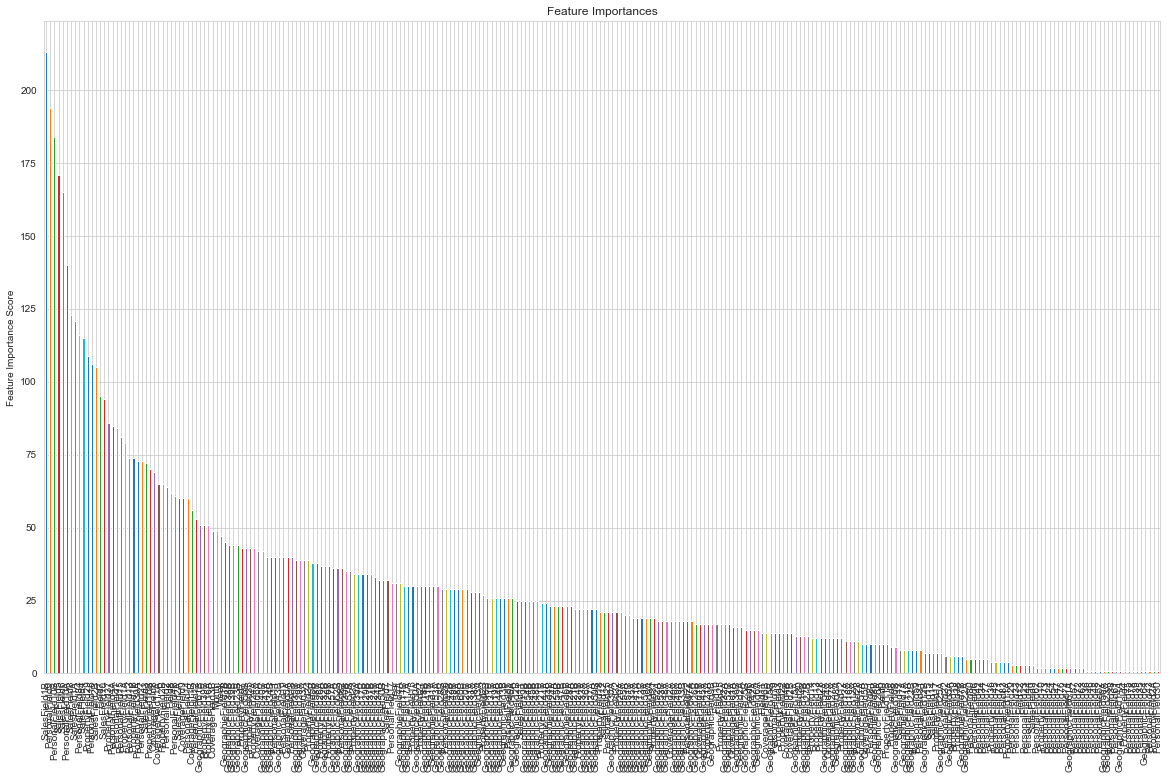

In [388]:
predictors = [x for x in X_train.columns if x not in [target]]

xgb1 = XGBClassifier(
 max_depth=8,
 learning_rate =0.1,
 n_estimators=1400,
 objective= 'binary:logistic',
 min_child_weight=1,
 gamma=14,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=11,
 scale_pos_weight=1,
# reg_alpha=L1,
 seed=27)

train_pred, train_prob, cvresult, feat_imp = modelfit(xgb1, X_train, predictors)

- `Max_depth`: The maximum depth of a tree, Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

- `learning_rate`: learning_rate parameter can be set to control the weighting of new trees added to the model.

- `n_estimators`: The number of trees (or rounds) in an XGBoost model is specified to the XGBClassifier in the n_estimators argument. The default in the XGBoost library is 100

- `objective`: Is one of the important parameter to select which indicate type of problem your feeding to model, In our case its binary classification.

- `min_child_weight`: minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be, simply put it used to control over-fitting..

- `gamma`: Gamma is dependent on both the training set and the other parameters you use, The higher Gamma is, the higher the regularization.

- `subsample`: Denotes the fraction of observations to be randomly samples for each tree, Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

- `colsample_bytree`:Denotes the fraction of columns to be randomly samples for each tree.,

- `nthread`: denote number of system threads that can be use in parellal computing.

- `scale_pos_weight`: Tune when if there is imbalance in dataset.

In [ ]:
 print ("AUC Score : %f" % metrics.roc_auc_score(dtrain['QuoteConversion_Flag'], dtrain_predprob))

In [389]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [390]:
train_prob

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [391]:
cvresult

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.946836       0.001345       0.946254      0.001760
1          0.950198       0.001217       0.949507      0.001665
2          0.951604       0.001849       0.951047      0.002806
3          0.952686       0.001381       0.952135      0.002408
4          0.953289       0.001220       0.952665      0.002309
5          0.954379       0.001042       0.953751      0.002047
6          0.954782       0.000894       0.954152      0.001831
7          0.955186       0.000834       0.954522      0.001796
8          0.955711       0.000753       0.955046      0.001687
9          0.956017       0.000427       0.955289      0.001346
10         0.956426       0.000287       0.955697      0.001205
11         0.956862       0.000281       0.956133      0.001014
12         0.957168       0.000186       0.956451      0.001124
13         0.957412       0.000218       0.956667      0.001008
14         0.957644       0.000265       0.956845      0.000977
15         0.957998       0.000265       0.957199      0.000927
16         0.958203       0.000244       0.957379      0.000906
17         0.958497       0.000230       0.957610      0.000964
18         0.958653       0.000274       0.957735      0.000937
19         0.958942       0.000244       0.957981      0.000944
20         0.959226       0.000245       0.958255      0.000858
21         0.959358       0.000229       0.958393      0.000860
22         0.959574       0.000251       0.958598      0.000883
23         0.959823       0.000220       0.958800      0.000923
24         0.959994       0.000266       0.958964      0.000889
25         0.960200       0.000279       0.959145      0.000820
26         0.960372       0.000324       0.959294      0.000792
27         0.960548       0.000305       0.959462      0.000764
28         0.960744       0.000275       0.959627      0.000749
29         0.960902       0.000203       0.959754      0.000794
..              ...            ...            ...           ...
761        0.976363       0.000299       0.966306      0.000737
762        0.976374       0.000297       0.966305      0.000738
763        0.976377       0.000295       0.966305      0.000738
764        0.976381       0.000298       0.966304      0.000739
765        0.976386       0.000299       0.966305      0.000737
766        0.976388       0.000301       0.966305      0.000737
767        0.976389       0.000300       0.966306      0.000737
768        0.976395       0.000300       0.966308      0.000737
769        0.976403       0.000298       0.966309      0.000737
770        0.976406       0.000298       0.966308      0.000737
771        0.976412       0.000299       0.966310      0.000740
772        0.976416       0.000301       0.966309      0.000741
773        0.976419       0.000300       0.966309      0.000739
774        0.976428       0.000293       0.966308      0.000739
775        0.976431       0.000291       0.966307      0.000739
776        0.976438       0.000295       0.966306      0.000740
777        0.976444       0.000296       0.966307      0.000739
778        0.976451       0.000296       0.966307      0.000738
779        0.976455       0.000300       0.966307      0.000738
780        0.976455       0.000300       0.966307      0.000738
781        0.976457       0.000297       0.966307      0.000737
782        0.976469       0.000301       0.966308      0.000741
783        0.976470       0.000300       0.966307      0.000742
784        0.976472       0.000298       0.966307      0.000742
785        0.976478       0.000295       0.966306      0.000743
786        0.976481       0.000298       0.966308      0.000741
787        0.976487       0.000295       0.966309      0.000741
788        0.976492       0.000299       0.966309      0.000741
789        0.976493       0.000299       0.966310      0.000739
790        0.976501       0.000297       0.966310      0.000742

[791 rows x 4 columns]

In [392]:
feat_imp.head(50)

SalesField1B          213
PersonalField9        194
PersonalField10B      184
SalesField5           171
SalesField6           165
PersonalField10A      140
SalesField8           123
SalesField1A          121
PersonalField84       116
SalesField4           115
PropertyField29       109
PersonalField16       106
SalesField2B          105
Field7                 95
SalesField10           94
PropertyField37        86
PersonalField4A        85
PersonalField1         84
PersonalField15        81
PropertyField1A        79
PersonalField13        74
PropertyField1B        74
PropertyField39A       73
PersonalField27        73
SalesField3            72
PropertyField16B       70
CoverageField8         69
CoverageField11A       65
PropertyField2B        65
PersonalField2         64
Field8                 62
PersonalField4B        61
SalesField2A           60
CoverageField9         60
PersonalField14        60
CoverageField11B       56
PersonalField12        53
GeographicField61B     51
PropertyFiel

- Above are top 50 important feature which contributing in our classification.

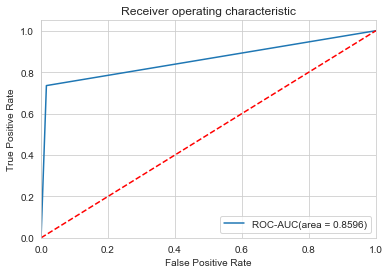

In [393]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(homesite_df["QuoteConversion_Flag"].values, train_pred)
fpr, tpr, thresholds = roc_curve(homesite_df["QuoteConversion_Flag"].values, train_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC-AUC(area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Test Predictions

In [394]:
dtest_predictions = xgb1.predict(X_test)

In [395]:
dtest_predictProba = xgb1.predict_proba(X_test)

In [396]:
dtest_predictProba

array([[9.9915302e-01, 8.4696914e-04],
       [9.5664829e-01, 4.3351706e-02],
       [9.7760391e-01, 2.2396091e-02],
       ...,
       [3.8174987e-03, 9.9618250e-01],
       [9.9962837e-01, 3.7165938e-04],
       [8.4164989e-01, 1.5835011e-01]], dtype=float32)

#### Saving Sample File

In [397]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = dtest_predictProba

In [399]:
subfile = 'XGBClassifier1.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: XGBClassifier1.csv


### Tuning max_depth and min_child_weight

In [410]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = 
                        XGBClassifier( learning_rate =0.1, n_estimators=50, max_depth=5,
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=12, scale_pos_weight=1, seed=27), 
          param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


In [411]:
gsearch1.fit(X_train[predictors],X_train['QuoteConversion_Flag'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=12, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [412]:
gsearch1.cv_results_

{'mean_fit_time': array([ 73.83765759,  68.13242359,  67.68000612,  93.68277874,
         92.22182002,  91.49858761, 131.14676938, 125.09629235,
        238.09444666, 116.00438948, 110.94490995, 102.94940944]),
 'std_fit_time': array([  3.81027516,   1.42077643,   1.36529911,   4.71119889,
          2.27109538,   4.40802837,   4.87000026,   2.25631036,
        251.32767658,   2.90579132,   4.07285519,   7.59301441]),
 'mean_score_time': array([1.54604034, 1.26365848, 1.07836599, 1.48616114, 1.43193059,
        1.47805076, 1.44633484, 1.43496537, 3.5870142 , 1.36156111,
        1.25105686, 1.12120328]),
 'std_score_time': array([0.4168378 , 0.21784223, 0.18363711, 0.11777745, 0.26882436,
        0.29572343, 0.23273915, 0.13417366, 4.64869434, 0.3523838 ,
        0.1481242 , 0.19123869]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
 

In [413]:
gsearch1.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [414]:
gsearch1.best_score_

0.9627735450364835

#### implementing 2nd iteration

[0]	train-auc:0.952491+0.000952186	test-auc:0.951349+0.00175102
[1]	train-auc:0.955586+0.000836471	test-auc:0.954454+0.00094903
[2]	train-auc:0.956882+0.000891497	test-auc:0.955728+0.00157251
[3]	train-auc:0.957795+0.000703447	test-auc:0.956647+0.00126706
[4]	train-auc:0.958283+0.000647849	test-auc:0.957079+0.00114875
[5]	train-auc:0.958977+0.000593429	test-auc:0.95774+0.00119078
[6]	train-auc:0.959404+0.000459817	test-auc:0.958119+0.00109036
[7]	train-auc:0.959813+0.000353764	test-auc:0.958566+0.00102919
[8]	train-auc:0.960104+0.000337858	test-auc:0.958792+0.00100165
[9]	train-auc:0.960406+0.000318819	test-auc:0.959094+0.000767573
[10]	train-auc:0.960797+0.00032381	test-auc:0.959463+0.000801912
[11]	train-auc:0.961134+0.000336969	test-auc:0.95973+0.00082072
[12]	train-auc:0.961386+0.000343634	test-auc:0.959953+0.000760744
[13]	train-auc:0.961628+0.00028532	test-auc:0.960164+0.000808882
[14]	train-auc:0.961888+0.000230384	test-auc:0.960407+0.000901911
[15]	train-auc:0.962095+0.00029324

[125]	train-auc:0.967607+0.000294714	test-auc:0.964659+0.000846885
[126]	train-auc:0.967624+0.000291116	test-auc:0.964672+0.00084503
[127]	train-auc:0.967642+0.000288695	test-auc:0.964688+0.000855723
[128]	train-auc:0.96767+0.000288619	test-auc:0.964705+0.000851308
[129]	train-auc:0.967681+0.000290238	test-auc:0.964707+0.000851167
[130]	train-auc:0.967681+0.000290238	test-auc:0.964707+0.000851167
[131]	train-auc:0.967692+0.000299299	test-auc:0.964712+0.000845746
[132]	train-auc:0.967692+0.000299299	test-auc:0.964712+0.000845746
[133]	train-auc:0.967692+0.000299299	test-auc:0.964712+0.000845746
[134]	train-auc:0.967699+0.000310332	test-auc:0.96472+0.000837957
[135]	train-auc:0.967702+0.000310808	test-auc:0.964724+0.000837619
[136]	train-auc:0.967707+0.00031157	test-auc:0.964731+0.00083105
[137]	train-auc:0.967707+0.00031157	test-auc:0.964731+0.00083105
[138]	train-auc:0.967733+0.000319907	test-auc:0.964755+0.000823234
[139]	train-auc:0.967733+0.000319907	test-auc:0.964755+0.000823234
[1

[249]	train-auc:0.968536+0.000426961	test-auc:0.965176+0.000789774
[250]	train-auc:0.968545+0.000427958	test-auc:0.965179+0.000786597
[251]	train-auc:0.968554+0.000440918	test-auc:0.965184+0.00078559
[252]	train-auc:0.968561+0.000442895	test-auc:0.965192+0.000785556
[253]	train-auc:0.968561+0.000442895	test-auc:0.965192+0.000785556
[254]	train-auc:0.968562+0.000442649	test-auc:0.96519+0.000783294
[255]	train-auc:0.968562+0.000442649	test-auc:0.96519+0.000783294
[256]	train-auc:0.968562+0.000442649	test-auc:0.96519+0.000783294
[257]	train-auc:0.968562+0.000442649	test-auc:0.96519+0.000783294
[258]	train-auc:0.968581+0.000434216	test-auc:0.965198+0.000788874
[259]	train-auc:0.968598+0.000429339	test-auc:0.965202+0.000786262
[260]	train-auc:0.968598+0.000429339	test-auc:0.965202+0.000786262
[261]	train-auc:0.968605+0.000423504	test-auc:0.965206+0.000788008
[262]	train-auc:0.968614+0.000412497	test-auc:0.965212+0.000798652
[263]	train-auc:0.968614+0.000412497	test-auc:0.965212+0.000798652


[372]	train-auc:0.969088+0.000394858	test-auc:0.965362+0.000789875
[373]	train-auc:0.969094+0.000395411	test-auc:0.965369+0.000787102
[374]	train-auc:0.969094+0.000395411	test-auc:0.965369+0.000787102
[375]	train-auc:0.969094+0.000395411	test-auc:0.965369+0.000787102
[376]	train-auc:0.9691+0.000404792	test-auc:0.965375+0.000780318
[377]	train-auc:0.9691+0.000404792	test-auc:0.965375+0.000780318
[378]	train-auc:0.9691+0.000404487	test-auc:0.965375+0.000780318
[379]	train-auc:0.969105+0.000412474	test-auc:0.96538+0.000775374
[380]	train-auc:0.969105+0.000412474	test-auc:0.96538+0.000775374
[381]	train-auc:0.969116+0.000416819	test-auc:0.965383+0.000772405
[382]	train-auc:0.969116+0.000416819	test-auc:0.965383+0.000772405
[383]	train-auc:0.969126+0.000409068	test-auc:0.965385+0.000773341
[384]	train-auc:0.969126+0.000409068	test-auc:0.965385+0.000773341
[385]	train-auc:0.969126+0.000409068	test-auc:0.965385+0.000773341
[386]	train-auc:0.969126+0.000409068	test-auc:0.965385+0.000773341
[38

[496]	train-auc:0.969471+0.000297071	test-auc:0.965488+0.000795488
[497]	train-auc:0.969477+0.000289008	test-auc:0.965489+0.000797054
[498]	train-auc:0.969496+0.000293921	test-auc:0.965495+0.000801876
[499]	train-auc:0.969505+0.000302452	test-auc:0.965492+0.000803736
[500]	train-auc:0.969505+0.000302452	test-auc:0.965492+0.000803736
[501]	train-auc:0.969505+0.000302452	test-auc:0.965492+0.000803736
[502]	train-auc:0.969505+0.000302452	test-auc:0.965492+0.000803736
[503]	train-auc:0.96951+0.00030381	test-auc:0.965498+0.000797793
[504]	train-auc:0.96951+0.00030381	test-auc:0.965498+0.000797793
[505]	train-auc:0.96951+0.00030381	test-auc:0.965498+0.000797793
[506]	train-auc:0.96951+0.00030381	test-auc:0.965498+0.000797793
[507]	train-auc:0.96951+0.00030381	test-auc:0.965498+0.000797793
[508]	train-auc:0.969512+0.000307384	test-auc:0.965504+0.000791482
[509]	train-auc:0.969516+0.000302155	test-auc:0.965503+0.000790209
[510]	train-auc:0.969516+0.000302155	test-auc:0.965503+0.000790209
[511]

[620]	train-auc:0.969811+0.00025571	test-auc:0.965599+0.000866367
[621]	train-auc:0.969817+0.000247794	test-auc:0.9656+0.000867337
[622]	train-auc:0.969819+0.000244868	test-auc:0.965602+0.000870249
[623]	train-auc:0.969819+0.000244868	test-auc:0.965602+0.000870249
[624]	train-auc:0.969823+0.000243305	test-auc:0.965603+0.000870824
[625]	train-auc:0.969823+0.000243305	test-auc:0.965603+0.000870824
[626]	train-auc:0.969823+0.000243305	test-auc:0.965603+0.000870824
[627]	train-auc:0.969824+0.000246048	test-auc:0.965603+0.000870424
[628]	train-auc:0.969824+0.000246048	test-auc:0.965603+0.000870424
[629]	train-auc:0.969836+0.000243503	test-auc:0.965598+0.000869716
[630]	train-auc:0.96984+0.0002452	test-auc:0.965597+0.000870739
[631]	train-auc:0.969846+0.000255922	test-auc:0.9656+0.00086837
[632]	train-auc:0.969856+0.00026023	test-auc:0.965601+0.000866931
[633]	train-auc:0.969856+0.00026023	test-auc:0.965601+0.000866931
[634]	train-auc:0.969862+0.000257532	test-auc:0.965603+0.00086822
[635]	t

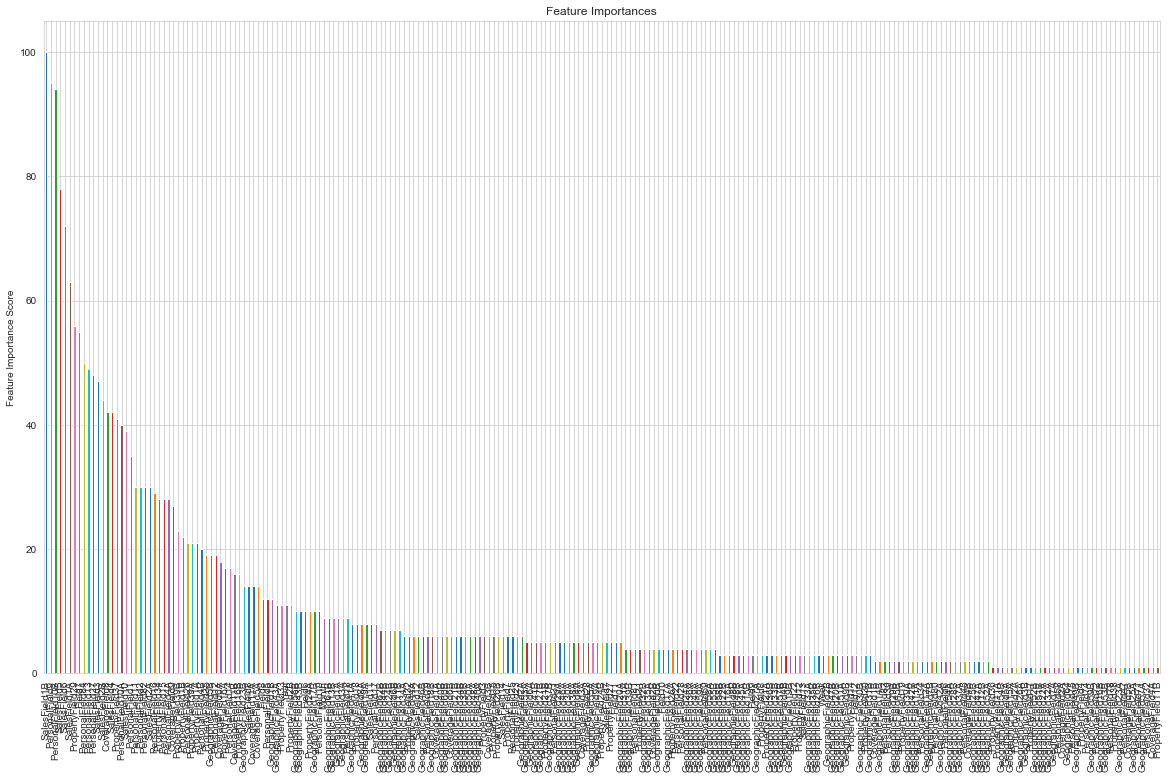

In [419]:
predictors = [x for x in X_train.columns if x not in [target]]

xgb1 = XGBClassifier(
 max_depth=11,
 learning_rate =0.18,
 n_estimators=700,
 objective= 'binary:logistic',
 min_child_weight=1,
 gamma=22,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=11,
 scale_pos_weight=1,
# reg_alpha=L1,
 seed=27)

train_pred, train_prob, cvresult, feat_imp = modelfit(xgb1, X_train, predictors)

#### Saving Sample File

In [421]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = dtest_predictProba

In [422]:
subfile = 'XGBClassifier2.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: XGBClassifier2.csv


## Results

#### Usong XGBoost model we achieve Area Under Receiver Operating Characteristic Curve (AUC) of :
From Model 1
- Accuracy : `0.9314`
- AUC Score (Train): `0.970278`

From Model 2
- Accuracy : `0.9374`
- AUC Score (Train): `0.976300`

From our both iterations we are achieving ROC-AUC score better than top competitor which is `0.97024`.<br />
Link to the Leaderboard: https://www.kaggle.com/c/homesite-quote-conversion/leaderboard

<img src="Images/Kaggle_leaderboard.png" width="800" align="Left" >

## Implementing H2O 

#### Initialising the H20

In [49]:
pct_memory=0.95
virtual_memory=psutil.virtual_memory()
print("Virtual Memory Size: ",virtual_memory)
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print("Minimum Memory Size: ",min_mem_size)

Virtual Memory Size:  svmem(total=16902189056, available=8807493632, percent=47.9, used=8094695424, free=8807493632)
Minimum Memory Size:  8


In [50]:
# Connect to a cluster
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:29233..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\kaila\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kaila\AppData\Local\Temp\tmp1mon4qlo
  JVM stdout: C:\Users\kaila\AppData\Local\Temp\tmp1mon4qlo\h2o_Kailash_started_from_python.out
  JVM stderr: C:\Users\kaila\AppData\Local\Temp\tmp1mon4qlo\h2o_Kailash_started_from_python.err
  Server is running at http://127.0.0.1:29233
Connecting to H2O server at http://127.0.0.1:29233... successful.


--------------------------  -------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.1.3
H2O cluster version age:    2 months and 6 days
H2O cluster name:           H2O_from_python_Kailash_jbisbv
H2O cluster total nodes:    1
H2O cluster free memory:    7.667 Gb
H2O cluster total cores:    12
H2O cluster allowed cores:  12
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:29233
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Algos, AutoML, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  -------------------------------

#### Importing Train and Test Dataset into H2O frame

In [51]:
H2O_train = h2o.import_file("train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [66]:
H2O_test = h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [52]:
predictors=[x for x in H2O_train.columns if x not in ['QuoteConversion_Flag']]
Target='QuoteConversion_Flag'

- Removed target value from train frame

In [1]:
# val_remove='QuoteNumber'
predictors = [x for x in H2O_train.columns if x not in ['QuoteNumber']]

NameError: name 'predictors' is not defined

- Removed QuoteNumber value from test frame, since it wont be contributing in classification.

In [53]:
# For binary classification, response should be a factor
H2O_train[Target] = H2O_train[Target].asfactor()

#### Lets Run H2OAutoML for 1hour

In [56]:
aml = H2OAutoML(max_runtime_secs=3600, seed=27)

In [405]:
# os.getcwd()
# os.chdir('temp/logs')
# logs_path = os.getcwd()
# logfile = 'logs.txt'

#### Train our model

In [58]:
model_start_time = time.time()
aml.train(x=predictors, y=Target, training_frame=H2O_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [59]:
meta_data={}
meta_data['model_execution_time'] = {"classification":(time.time() - model_start_time)}
meta_data

{'model_execution_time': {'classification': 3613.703415632248}}

#### Lets print the Leaderboard 

In [60]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id auc logloss mean_per_class_error rmse mse 
 
 
 GBM_1_AutoML_20190401_183123 0.96388 0.173366 0.137265 0.2298 0.052808 
 StackedEnsemble_BestOfFamily_AutoML_20190401_183123 0.962323 0.185778 0.139232 0.233857 0.054689 
 StackedEnsemble_AllModels_AutoML_20190401_183123 0.962323 0.185778 0.139232 0.233857 0.054689 
 DRF_1_AutoML_20190401_183123 0.952619 0.227683 0.145782 0.259564 0.0673737 
 XRT_1_AutoML_20190401_183123 0.945757 0.259927 0.154815 0.275009 0.0756301 
 GLM_grid_1_AutoML_20190401_183123_model_1 0.944317 0.207195 0.167292 0.248745 0.0618741

- Get the top model from leaderboard

In [62]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [402]:
print(mod_best1.auc())

0.9758751240942827


In [64]:
print(mod_best1.algo)

gbm


#### predicting the probability from our best model

In [67]:
pred_H2O=mod_best1.predict(H2O_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


#### In h2O the predict function gives o/p in 3 column:
- Predict is binery predictions
- p0 and p1 repreent the value at which probability of predicting(i.e Predit) the value. 

In [89]:
pred_H2O

predict p0 p1 
 
 
 0 0.995144 0.00485575 
 0 0.962084 0.0379155 
 0 0.961356 0.0386437 
 0 0.986601 0.0133986 
 0 0.741064 0.258936 
 0 0.972113 0.0278869 
 0 0.998157 0.00184314 
 0 0.96626 0.0337405 
 0 0.998383 0.0016165 
 0 0.999389 0.000610553

In [85]:
print(mod_best1.model_id)

GBM_1_AutoML_20190401_183123


In [70]:
print(mod_best1.gini)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20190401_183123


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.044125363677364
RMSE: 0.21006038102737032
LogLoss: 0.14848211742305967
Mean Per-Class Error: 0.08936353802302799
AUC: 0.9758751240942827
pr_auc: 0.909755557491706
Gini: 0.9517502481885654
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39919681144371066: 


0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      205500  6359   0.03     (6359.0/211859.0)
1      9358    39536  0.1914   (9358.0/48894.0)
Total  214858  45895  0.0603   (15717.0/260753.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.399197     0.83419   182
max f2                       0.201632     0.859914  260
max f0point5                 0.590998     0.88923   119
max accuracy                 0.466701     0.940979  158
max precision                0.998982     1         0
max recall                   0.00368604   1         391
max specificity              0.998982     1         0
max absolute_mcc             0.414056     0.798767  177
max min_per_class_accuracy   0.219879     0.910332  252
max mean_per_class_accuracy  0.227078     0.910636  249

Gains/Lift Table: Avg response rate: 18.75 %, avg score: 18.75 %



group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0100018                   0.99736            5.33303    5.33303            1                0.998309     1                           0.998309            0.0533399       0.0533399                  433.303   433.303
    2        0.0200036                   0.994246           5.33098    5.332              0.999617         0.995751     0.999808                    0.99703             0.0533194       0.106659                   433.098   433.2
    3        0.0300016                   0.992408           5.33098    5.33166            0.999616         0.993249     0.999744                    0.99577             0.053299        0.159958                   433.098   433.166
    4        0.0400034                   0.990899           5.32894    5.33098            0.999233         0.991636     0.999617                    0.994737            0.053299        0.213257                   432.894   433.098
    5        0.0500013                   0.989206           5.32484    5.32975            0.998466         0.990093     0.999386                    0.993808            0.0532376       0.266495                   432.484   432.975
    6        0.100003                    0.900224           5.30562    5.31769            0.994861         0.966017     0.997124                    0.979912            0.265288        0.531783                   430.562   431.769
    7        0.15                        0.496695           4.16923    4.93489            0.781775         0.661404     0.925345                    0.873748            0.208451        0.740234                   316.923   393.489
    8        0.200002                    0.324397           2.27793    4.27063            0.427136         0.403541     0.80079                     0.756194            0.113899        0.854133                   127.793   327.063
    9        0.3                         0.123543           0.987454   3.17625            0.185158         0.211438     0.595582                    0.574611            0.0987442       0.952878                   -1.25464  217.625
    10       0.399999                    0.0545189          0.329901   2.46467            0.06186          0.0820002    0.462153                    0.45146             0.0329897       0.985867                   -67.0099  146.467
    11       0.500002                    0.0280637          0.108804   1.99349            0.0204019        0.0400203    0.373801                    0.36917             0.0108807       0.996748                   -89.1196  99.3488
    12       0.600001                    0.00973052         0.0294518  1.66615            0.00552253       0.0185314    0.312422                    0.310731            0.00294515      0.999693                   -97.0548  66.6153
    13       0.7                         0.00327772         0.0030679  1.42857            0.000575264      0.00548336   0.267873                    0.267125            0.000306786     1                          -99.6932  42.8572
    14       0.799998                    0.00202067         0          1.25               0                0.00252915   0.234389                    0.23405             0               1                          -100      25.0002
    15       0.899997                    0.00137003         0          1.11111            0                0.001687     0.208346                    0.208232            0               1                          -100      11.1114
    16       1                           7.70775e-05        0          1                  0    



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.052807955887870094
RMSE: 0.2297998169883303
LogLoss: 0.17336579218896572
Mean Per-Class Error: 0.11077331368998644
AUC: 0.9638802347924962
pr_auc: 0.8654830925607323
Gini: 0.9277604695849924
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3863562344923601: 


0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      203003  8856   0.0418   (8856.0/211859.0)
1      11379   37515  0.2327   (11379.0/48894.0)
Total  214382  46371  0.0776   (20235.0/260753.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.386356     0.787593  187
max f2                       0.150188     0.829402  282
max f0point5                 0.717004     0.861607  88
max accuracy                 0.478175     0.925964  156
max precision                0.998783     1         0
max recall                   0.00204961   1         395
max specificity              0.998783     1         0
max absolute_mcc             0.4746       0.744099  157
max min_per_class_accuracy   0.189678     0.888596  264
max mean_per_class_accuracy  0.193801     0.889227  262

Gains/Lift Table: Avg response rate: 18.75 %, avg score: 18.62 %



group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  -----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0100018                   0.997531           5.33303      5.33303            1                0.998457     1                           0.998457            0.0533399       0.0533399                  433.303   433.303
    2        0.0200036                   0.994592           5.32485      5.32894            0.998466         0.995956     0.999233                    0.997206            0.0532581       0.106598                   432.485   432.894
    3        0.0300016                   0.992736           5.31871      5.32553            0.997315         0.993616     0.998594                    0.99601             0.0531763       0.159774                   431.871   432.553
    4        0.0400034                   0.990981           5.32485      5.32536            0.998466         0.991869     0.998562                    0.994974            0.0532581       0.213032                   432.485   432.536
    5        0.0500013                   0.988966           5.32075      5.32444            0.997699         0.990015     0.998389                    0.993983            0.0531967       0.266229                   432.075   432.444
    6        0.100003                    0.890832           5.27372      5.29908            0.988879         0.964403     0.993634                    0.979193            0.263693        0.529922                   427.372   429.908
    7        0.15                        0.487577           3.43986      4.67937            0.64501          0.64471      0.877432                    0.867704            0.171984        0.701906                   243.986   367.937
    8        0.200002                    0.320318           2.1818       4.05497            0.409112         0.398081     0.76035                     0.750296            0.109093        0.810999                   118.18    305.497
    9        0.3                         0.122632           1.15803      3.08933            0.217143         0.208935     0.579283                    0.569845            0.115802        0.926801                   15.8029   208.933
    10       0.399999                    0.0550727          0.465707     2.43343            0.087325         0.0820288    0.456295                    0.447892            0.0465701       0.973371                   -53.4293  143.343
    11       0.500002                    0.0289881          0.183862     1.98351            0.0344761        0.0406587    0.371929                    0.366443            0.0183867       0.991758                   -81.6138  98.3508
    12       0.600001                    0.00967449         0.0717888    1.66489            0.0134612        0.0190305    0.312185                    0.308542            0.00717879      0.998936                   -92.8211  66.4892
    13       0.7                         0.00347879         0.0100218    1.42848            0.00187919       0.00559557   0.267856                    0.265264            0.00100217      0.999939                   -98.9978  42.8485
    14       0.799998                    0.00205353         0.000409053  1.24998            7.67018e-05      0.00265106   0.234384                    0.232438            4.09048e-05     0.99998                    -99.9591  24.9977
    15       0.899997                    0.00128481         0.000204526  1.11111            3.83509e-05      0.00166528   0.208346                    0.206797            2.04524e-05     1                          -99.9795  11.1114
    16       1                           4.56671e-05       


Cross-Validation Metrics Summary: 


mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.922835  0.00133913   0.921075      0.926214      0.923031      0.922857      0.920997
auc                      0.963885  0.000779714  0.9632        0.965417      0.963007      0.965017      0.962784
err                      0.077165  0.00133913   0.0789247     0.0737857     0.0769688     0.0771429     0.0790029
err_count                4024.2    69.8261      4116          3848          4014          4023          4120
f0point5                 0.802567  0.00774376   0.793945      0.822376      0.805302      0.79938       0.79183
f1                       0.788233  0.00234641   0.787704      0.790391      0.78949       0.7915        0.78208
f2                       0.774598  0.00572061   0.78156       0.760801      0.774287      0.783774      0.772567
lift_top_group           5.3333    0.0271518    5.31015       5.33569       5.29667       5.31817       5.40583
logloss                  0.173366  0.00137875   0.175526      0.170715      0.174499      0.171338      0.174752
max_per_class_error      0.234135  0.00927006   0.222482      0.257725      0.235527      0.221293      0.233648
mcc                      0.741796  0.00337666   0.739337      0.74816       0.743054      0.744341      0.734088
mean_per_class_accuracy  0.862462  0.00296554   0.86595       0.855457      0.862203      0.867473      0.861225
mean_per_class_error     0.137538  0.00296554   0.13405       0.144543      0.137797      0.132527      0.138775
mse                      0.052808  0.000428     0.0535343     0.0518995     0.053068      0.0523171     0.0532209
precision                0.812545  0.012428     0.79816       0.845177      0.8162        0.804721      0.798466
r2                       0.653362  0.00321611   0.64977       0.659211      0.653498      0.657336      0.646997
recall                   0.765865  0.00927006   0.777518      0.742275      0.764473      0.778707      0.766352
rmse                     0.229796  0.000932227  0.231375      0.227815      0.230365      0.228729      0.230696
specificity              0.959058  0.00362118   0.954382      0.968639      0.959934      0.956239      0.956097

Scoring History: 


timestamp            duration           number_of_trees    training_rmse        training_logloss     training_auc        training_pr_auc     training_lift      training_classification_error
---  -------------------  -----------------  -----------------  -------------------  -------------------  ------------------  ------------------  -----------------  -------------------------------
     2019-04-01 19:19:58  9 min 36.982 sec   0.0                0.3903210104223659   0.4825933808088175   0.5                 0.0                 1.0                0.8124892139304246
     2019-04-01 19:20:00  9 min 39.322 sec   5.0                0.3221086510345878   0.34905908628724985  0.93144140789199    0.8228374104068121  5.330339883976636  0.10487702921922279
     2019-04-01 19:20:02  9 min 41.529 sec   10.0               0.2811422124196773   0.28050460169500546  0.9488262674148559  0.8599254131164396  5.330379227022462  0.09691163668299119
     2019-04-01 19:20:05  9 min 43.743 sec   15.0               0.26416661685881404  0.2495651774712035   0.953399075832156   0.8715531608819147  5.333026547224609  0.08672191690987256
     2019-04-01 19:20:07  9 min 45.951 sec   20.0               0.25220640308929954  0.22699191969578245  0.9552587560371352  0.8778788122261922  5.333026547224609  0.08181305680088052
---  ---                  ---                ---                ---                  ---                  ---                 ---                 ---                ---
     2019-04-01 19:21:11  10 min 50.419 sec  155.0              0.2121657805291751   0.1512994040219014   0.9747263572721291  0.9092177348522472  5.333026547224609  0.06184396727937934
     2019-04-01 19:21:14  10 min 52.815 sec  160.0              0.21155254285750522  0.150482653813162    0.9750834974625523  0.9094480162609448  5.333026547224609  0.06101176208902678
     2019-04-01 19:21:16  10 min 55.298 sec  165.0              0.21084456256601905  0.14954691836336007  0.9754697074127114  0.9103448540312714  5.333026547224609  0.06096190647854483
     2019-04-01 19:21:18  10 min 57.656 sec  170.0              0.21046774427239015  0.14902121910248586  0.9756576724001943  0.9088034146309147  5.333026547224609  0.06074714384877643
     2019-04-01 19:21:20  10 min 59.553 sec  174.0              0.21006038102737032  0.14848211742305967  0.9758751240942827  0.909755557491706   5.333026547224609  0.06027543307267798


See the whole table with table.as_data_frame()
Variable Importances: 


variable            relative_importance    scaled_importance    percentage
------------------  ---------------------  -------------------  --------------------
SalesField5         29626.634765625        1.0                  0.24743385499341355
PropertyField37     29068.984375           0.9811773967905384   0.24277650572028506
PersonalField9      6456.65966796875       0.21793429186430047  0.05392432197124359
PersonalField2      5854.236328125         0.19760044886763567  0.048893040811747994
PersonalField1      5749.06591796875       0.19405058871685416  0.04801468522995263
---                 ---                    ---                  ---
PropertyField5      0.0                    0.0                  0.0
PropertyField20     0.0                    0.0                  0.0
GeographicField5A   0.0                    0.0                  0.0
GeographicField10B  0.0                    0.0                  0.0
GeographicField23A  0.0                    0.0                  0.0


See the whole table with table.as_data_frame()
<bound method ModelBase.gini of >


In [150]:
params_list = []
for key, value in mod_best1.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190401_183123'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_1_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_1_sid_9c47'}",
 'validation_frame = None',
 'nfolds = 5',
 'keep_cross_validation_models = False',
 'keep_cross_validation_predictions = True',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 5',
 'fold_assignment = Modulo',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'ignored_columns = []',
 'ignore_const_cols = True',
 'offset_column = None

#### The above function prints the parameters that are used in model with there values and we can take out Hyperparameters from that 

#### Lets get parameter values from our other models, We can later used them in our stack ensemble modeling

- Lets pick Hyperparameter from our DRF and XRT model from leaderboard.

In [407]:
params_list = []
for key, value in h2o.get_model(model_set[3]).params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DRF_1_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/DRF_1_AutoML_20190401_183123'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_1_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_1_sid_9c47'}",
 'validation_frame = None',
 'nfolds = 5',
 'keep_cross_validation_models = False',
 'keep_cross_validation_predictions = True',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 0',
 'fold_assignment = Modulo',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'ignored_columns = []',
 'ignore_const_cols = True',
 'offset_column = None

In [408]:
params_list = []
for key, value in h2o.get_model(model_set[4]).params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'XRT_1_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/XRT_1_AutoML_20190401_183123'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_1_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_1_sid_9c47'}",
 'validation_frame = None',
 'nfolds = 5',
 'keep_cross_validation_models = False',
 'keep_cross_validation_predictions = True',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 0',
 'fold_assignment = Modulo',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'ignored_columns = []',
 'ignore_const_cols = True',
 'offset_column = None

- Gini give overall performance of model for varios `evaluation matrics`.

#### Lets  go through our 2nd best model

In [107]:
mod_best2=h2o.get_model(model_set[1])
mod_best2.auc()

0.9857477574968263

In [108]:
mod_best2.algo

'stackedensemble'

In [151]:
params_list = []
for key, value in mod_best2.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_BestOfFamily_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190401_183123'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_py_1_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_py_1_sid_9c47'}",
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'validation_frame = None',
 "base_models = [{'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190401_183123', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190401_183123'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_typ

In [250]:
# pred_H2O_stackedensemble = mod_best2.predict(H2O_test)

#### Save Models

In [121]:
# uncomment if you want to export the best model
h2o.save_model(mod_best1, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//bestModel2.csv", force=True)

'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\Assignment_3_KaggleCompetition\\homesite-quote-conversion\\bestModel2.csv\\GBM_1_AutoML_20190401_183123'

In [122]:
h2o.export_file(pred_H2O, "/tmp/bestPreds1.csv", force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


## Results

#### Using H2O Automl we achieve Area Under Receiver Operating Characteristic Curve (AUC) of :

- Model name: `Gradient Boosting Machine (GBM)` 
- AUC Score : `0.97587`

- Model name: `StackedEnsemble'
- AUC Scorec: `0.985747`

From our both iterations we are achieving ROC-AUC score better than top competitor which is `0.97024`.<br />
Link to the Leaderboard: https://www.kaggle.com/c/homesite-quote-conversion/leaderboard

<img src="Images/Kaggle_leaderboard.png" width="800" align="Left" >

## GBM Model

### Model 1

In [124]:
X_train = homesite_df.drop("QuoteConversion_Flag",axis=1)
Y_train = homesite_df["QuoteConversion_Flag"]
X_test  = test_df.drop("QuoteNumber",axis=1).copy()

In [125]:
X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train, Y_train, random_state=20)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
classifiers = [GradientBoostingClassifier()]

In [127]:
print(classifiers)

[GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)]


In [128]:
for classifier in classifiers:
    homesite_log = classifier 
    homesite_log.fit(X_train_sub, y_train_sub)

    show_validation = True

    if (show_validation == True):
        y_probs = homesite_log.predict_proba(X_validation_sub)
        y_pred = homesite_log.predict(X_validation_sub)
        print(type(classifier))
        print("accuracy_score1:", accuracy_score(y_validation_sub, y_pred))
        print("log_loss1:", log_loss(y_validation_sub, y_probs))
    
    elif (show_validation == False):
        y_probs = homesite_log.predict_proba(X_train_sub)
        y_pred = homesite_log.predict(X_train_sub)
        print(type(classifier))
        print("accuracy_score:", accuracy_score(y_train_sub, y_pred))
        print("log_loss:", log_loss(y_train_sub, y_probs))

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
accuracy_score1: 0.9219807022657197
log_loss1: 0.1905459699232268


### Model 2

In [129]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['QuoteConversion_Flag'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['QuoteConversion_Flag'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['QuoteConversion_Flag'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['QuoteConversion_Flag'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances',figsize=(20,12))
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9232
AUC Score (Train): 0.959501
CV Score : Mean - 0.9592153 | Std - 0.0009584875 | Min - 0.9575986 | Max - 0.9605393


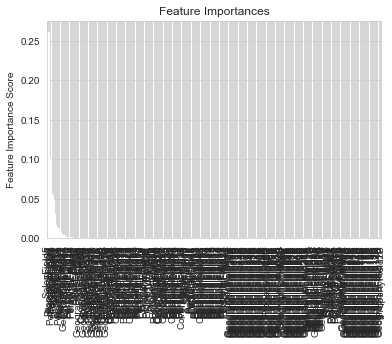

In [130]:
#Choose all predictors except target & IDcols
target='QuoteConversion_Flag'
predictors = [x for x in homesite_df.columns if x not in [target]]

gbm0 = GradientBoostingClassifier(random_state=10,max_depth=15)

modelfit(gbm0, homesite_df, predictors)

In [131]:
gbm0.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [134]:
gbm_proba=gbm0.predict_proba(X_test)

In [135]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = gbm_proba

In [136]:
subfile = 'Predictions_GBM1.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: Predictions_GBM1.csv


### XGBoost Using H20

### Stack Ensembled Using H2O

In [406]:
# train = h2o.import_file("train.csv")
# test = h2o.import_file("test.csv")
train=H2O_train
test=H2O_test

In [215]:
# Identify predictors and response
x = train.columns
y = "QuoteConversion_Flag"
x.remove(y)

In [216]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

In [217]:
# Number of CV folds (to generate level-one data for stacking)
nfolds = 5

#### Based on our H2O leaderboard, lets pick hyperparameter value from their and used in our stack ensemble model

In [218]:
# Train and cross-validate a GBM
my_gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      ntrees=174,
                                      max_depth=15,
                                      min_rows=100.0,
                                      learn_rate=0.1,
                                      nfolds=nfolds,
                                      nbins_cats = 1024,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=27)
my_gbm.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [219]:
# Train and cross-validate a RF
my_rf = H2ORandomForestEstimator(ntrees=45,
                                 max_depth = 25,
                                 nfolds=nfolds,
                                 fold_assignment="Modulo",
                                 sample_rate=0.63,
                                 keep_cross_validation_predictions=True,
                                 seed=27)
my_rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [220]:
# Train a stacked ensemble using the GBM and GLM above
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=[my_gbm, my_rf])
ensemble.train(x=x, y=y, training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


#### Eval ensemble performance on the train data

In [221]:
perf_stack_test = ensemble.model_performance(train)

In [222]:
perf_stack_test


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.02595822341584187
RMSE: 0.1611155591984892
LogLoss: 0.09983947514565716
Null degrees of freedom: 260752
Residual degrees of freedom: 260750
Null deviance: 251675.34365208313
Residual deviance: 52066.88532531109
AIC: 52072.88532531109
AUC: 0.9922392124850552
pr_auc: 0.9367097620052114
Gini: 0.9844784249701104
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4282448308481734: 


0       1      Error    Rate
-----  ------  -----  -------  -----------------
0      208855  3004   0.0142   (3004.0/211859.0)
1      5700    43194  0.1166   (5700.0/48894.0)
Total  214555  46198  0.0334   (8704.0/260753.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.428245     0.908468  197
max f2                       0.181743     0.916827  282
max f0point5                 0.644445     0.941662  132
max accuracy                 0.460101     0.966719  186
max precision                0.99277      1         0
max recall                   0.0248174    1         378
max specificity              0.99277      1         0
max absolute_mcc             0.436949     0.888749  194
max min_per_class_accuracy   0.189577     0.948215  279
max mean_per_class_accuracy  0.205349     0.948413  273

Gains/Lift Table: Avg response rate: 18.75 %, avg score: 19.19 %



group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0100018                   0.991736           5.33303     5.33303            1                0.992571   1                           0.992571            0.0533399       0.0533399                  433.303   433.303
    2        0.0200036                   0.990317           5.33303     5.33303            1                0.991004   1                           0.991787            0.0533399       0.10668                    433.303   433.303
    3        0.0300016                   0.989135           5.33303     5.33303            1                0.989725   1                           0.9911              0.0533194       0.159999                   433.303   433.303
    4        0.0400034                   0.98775            5.33303     5.33303            1                0.988478   1                           0.990445            0.0533399       0.213339                   433.303   433.303
    5        0.0500013                   0.986041           5.33303     5.33303            1                0.986926   1                           0.989741            0.0533194       0.266658                   433.303   433.303
    6        0.100003                    0.955606           5.33262     5.33282            0.999923         0.975798   0.999962                    0.982769            0.266638        0.533297                   433.262   433.282
    7        0.15                        0.689811           5.12808     5.26458            0.961571         0.861359   0.987165                    0.942301            0.256391        0.789688                   412.808   426.458
    8        0.200002                    0.272069           2.7201      4.62845            0.510048         0.457892   0.867884                    0.821197            0.136009        0.925696                   172.01    362.845
    9        0.3                         0.0558126          0.667779    3.30824            0.125216         0.12811    0.620331                    0.590171            0.0667771       0.992474                   -33.2221  230.824
    10       0.399999                    0.0293723          0.0705616   2.49883            0.0132311        0.0385316  0.468557                    0.452262            0.00705608      0.99953                    -92.9438  149.883
    11       0.500002                    0.0226322          0.00470393  1.99999            0.000882037      0.0256011  0.37502                     0.366928            0.000470405     1                          -99.5296  99.9992
    12       0.600001                    0.0182748          0           1.66666            0                0.0202999  0.312518                    0.309157            0               1                          -100      66.6665
    13       0.7                         0.0165438          0           1.42857            0                0.017189   0.267873                    0.267448            0               1                          -100      42.8572
    14       0.799998                    0.0158118          0           1.25               0                0.0161848  0.234389                    0.23604             0               1                          -100      25.0002
    15       0.899997                    0.015343           0           1.11111            0                0.0154451  0.208346                    0.21153             0               1                          -100      11.1114
    16       1                           0.015045           0           1                  0                0.

#### Compare to base learner performance on the train set

In [223]:
perf_gbm_test = my_gbm.model_performance(train)
perf_rf_test = my_rf.model_performance(train)
baselearner_best_auc_test = max(perf_gbm_test.auc(), perf_rf_test.auc())
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

Best Base-learner Test AUC:  0.9954389055307583
Ensemble Test AUC:  0.9922392124850552


In [224]:
pred_stack = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [225]:
pred_stack.head(40)

predict p0 p1 
 
 
 0 0.982941 0.0170594 
 0 0.974815 0.0251851 
 0 0.976915 0.0230849 
 0 0.983233 0.0167668 
 0 0.754973 0.245027 
 0 0.976873 0.0231269 
 0 0.984497 0.015503 
 0 0.973764 0.0262361 
 0 0.984649 0.0153514 
 0 0.983892 0.0161077 
 0 0.974993 0.0250074 
 0 0.724496 0.275504 
 0 0.984866 0.015134 
 0 0.885495 0.114505 
 0 0.942187 0.0578129 
 0 0.956487 0.0435128 
 0 0.983041 0.0169586 
 0 0.98463 0.0153698 
 0 0.951345 0.0486545 
 0 0.962608 0.0373922 
 0 0.936527 0.0634732 
 0 0.855002 0.144998 
 0 0.931568 0.068432 
 0 0.955198 0.0448024 
 1 0.0742518 0.925748 
 1 0.265467 0.734533 
 1 0.0098091 0.990191 
 0 0.976048 0.0239522 
 0 0.984898 0.0151018 
 0 0.981101 0.0188994 
 0 0.59942 0.40058 
 0 0.901691 0.0983088 
 0 0.984673 0.0153266 
 1 0.122197 0.877803 
 0 0.984019 0.0159812 
 0 0.980754 0.019246 
 0 0.636189 0.363811 
 0 0.903828 0.0961721 
 0 0.979999 0.0200005 
 1 0.516317 0.483683

In [226]:
params_list = []
for key, value in ensemble.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'my_ensemble_binomial', 'type': 'Key<Model>', 'URL': '/3/Models/my_ensemble_binomial'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_12_sid_9c47', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_12_sid_9c47'}",
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'QuoteConversion_Flag', 'is_member_of_frames': None}",
 'validation_frame = None',
 "base_models = [{'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_model_python_1554157670459_1549', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_model_python_1554157670459_1549'}, {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DRF_model_python_1554157670459_1884', 'type': 'Key

#### Saving file

In [227]:
# uncomment if you want to export the best model
h2o.save_model(ensemble, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModel_0.99.csv", force=True)

'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\Assignment_3_KaggleCompetition\\homesite-quote-conversion\\StackEnsembleModel_0.99.csv\\my_ensemble_binomial'

In [228]:
h2o.export_file(pred_stack, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModelpred2.csv", force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


In [173]:
df_read=pd.read_csv("C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModelpred2.csv")

In [192]:
df_read['QuoteConversion_Flag'] = np.where(df_read['p0'] >100, df_read['p0'] ,df_read['p0'])

In [193]:
df_read['QuoteConversion_Flag']

0         0.986626
1         0.977378
2         0.978729
3         0.985654
4         0.910024
5         0.976472
6         0.988904
7         0.973513
8         0.988936
9         0.986412
10        0.978132
11        0.751206
12        0.988426
13        0.925089
14        0.931767
15        0.965539
16        0.989342
17        0.989010
18        0.966392
19        0.959851
20        0.928491
21        0.730863
22        0.919627
23        0.924594
24        0.442502
25        0.500990
26        0.003462
27        0.979556
28        0.988830
29        0.984798
            ...   
173806    0.014845
173807    0.566487
173808    0.960435
173809    0.974810
173810    0.032034
173811    0.940547
173812    0.475428
173813    0.968963
173814    0.587302
173815    0.892047
173816    0.967736
173817    0.966636
173818    0.970737
173819    0.872007
173820    0.988936
173821    0.205729
173822    0.154498
173823    0.345092
173824    0.002694
173825    0.594492
173826    0.954997
173827    0.

In [194]:
test['QuoteNumber']

QuoteNumber 
 
 
 3 
 5 
 7 
 9 
 10 
 11 
 15 
 16 
 17 
 21

In [195]:
sub = pd.DataFrame(columns=['QuoteNumber','QuoteConversion_Flag'])
sub['QuoteNumber'] = test_df.QuoteNumber
sub['QuoteConversion_Flag'] = df_read['QuoteConversion_Flag']


subfile = 'Combine_stack_op_p0_p2.csv'
sub.to_csv(subfile,index=False)
print('Saved file: ' + subfile)

Saved file: Combine_stack_op_p0_p2.csv


#### 2. Generate a random grid of models and stack them together

In [234]:
# Specify GBM hyperparameters for the grid
hyper_params = {"learn_rate": [0.1, 0.07],
                "max_depth": [3, 4, 5, 6, 9],
                "sample_rate": [0.7, 0.8, 0.9, 1.0],
                "col_sample_rate": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 6, "seed": 27}

In [235]:
# Train the grid
grid = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees=200,
                                                        seed=27,
                                                        nfolds=nfolds,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     grid_id="gbm_grid_binomial")
grid.train(x=x, y=y, training_frame=train)


gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [236]:
# Train a stacked ensemble using the GBM grid
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_gbm_grid_binomial",
                                       base_models=grid.model_ids)
ensemble.train(x=x, y=y, training_frame=train)


stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [237]:
perf_stack_test = ensemble.model_performance(train)

In [238]:
perf_stack_test


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.042811471968583134
RMSE: 0.2069093327247061
LogLoss: 0.15225261591608222
Null degrees of freedom: 260752
Residual degrees of freedom: 260744
Null deviance: 251675.34365208313
Residual deviance: 79400.65271593237
AIC: 79418.65271593237
AUC: 0.9762446444403008
pr_auc: 0.8825859013341169
Gini: 0.9524892888806016
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37783912546515475: 


0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      205257  6602   0.0312   (6602.0/211859.0)
1      8867    40027  0.1814   (8867.0/48894.0)
Total  214124  46629  0.0593   (15469.0/260753.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.377839     0.83806   207
max f2                       0.127454     0.859137  305
max f0point5                 0.696992     0.892946  106
max accuracy                 0.501877     0.94247   167
max precision                0.993        1         0
max recall                   0.0221136    1         391
max specificity              0.993        1         0
max absolute_mcc             0.455181     0.804175  182
max min_per_class_accuracy   0.139805     0.910214  299
max mean_per_class_accuracy  0.157265     0.910483  290

Gains/Lift Table: Avg response rate: 18.75 %, avg score: 18.98 %



group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------
    1        0.0100018                   0.991431           5.33303     5.33303            1                0.992804   1                           0.992804            0.0533399       0.0533399                  433.303   433.303
    2        0.0200036                   0.991149           5.33303     5.33303            1                0.991278   1                           0.992041            0.0533399       0.10668                    433.303   433.303
    3        0.0300016                   0.990849           5.32689     5.33098            0.998849         0.991022   0.999617                    0.991702            0.0532581       0.159938                   432.689   433.098
    4        0.0400034                   0.989153           5.32485     5.32945            0.998466         0.990053   0.999329                    0.991289            0.0532581       0.213196                   432.485   432.945
    5        0.0500013                   0.987922           5.32484     5.32853            0.998466         0.988497   0.999156                    0.990731            0.0532376       0.266434                   432.484   432.853
    6        0.100003                    0.956363           5.30112     5.31482            0.994017         0.977868   0.996587                    0.9843              0.265063        0.531497                   430.112   431.482
    7        0.15                        0.572356           4.25677     4.96216            0.79819          0.779312   0.930458                    0.915974            0.212828        0.744324                   325.677   396.216
    8        0.200002                    0.272425           2.26566     4.28802            0.424835         0.406423   0.80405                     0.788584            0.113286        0.85761                    126.566   328.802
    9        0.3                         0.0652546          0.942458    3.17285            0.176721         0.139988   0.594943                    0.572388            0.0942447       0.951855                   -5.75422  217.285
    10       0.399999                    0.0336819          0.347081    2.46641            0.0650815        0.0447055  0.462479                    0.440469            0.0347077       0.986563                   -65.2919  146.641
    11       0.500002                    0.0275209          0.102668    1.99365            0.0192514        0.0302042  0.373831                    0.358414            0.0102671       0.99683                    -89.7332  99.3652
    12       0.600001                    0.0239834          0.0304744   1.66646            0.00571429       0.0256573  0.312479                    0.302955            0.00304741      0.999877                   -96.9526  66.646
    13       0.7                         0.0202474          0.00122716  1.42857            0.000230105      0.0217859  0.267873                    0.262789            0.000122714     1                          -99.8773  42.8572
    14       0.799998                    0.0196679          0           1.25               0                0.020026   0.234389                    0.232444            0               1                          -100      25.0002
    15       0.899997                    0.0193237          0           1.11111            0                0.0194806  0.208346                    0.208781            0               1                          -100      11.1114
    16       1                           0.0184351          0           1                  0                0.0

In [239]:
# Generate predictions on a test set (if neccessary)
pred_stack2 = ensemble.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [240]:
pred_stack2

predict p0 p1 
 
 
 0 0.979681 0.0203191 
 0 0.972725 0.0272747 
 0 0.968681 0.0313191 
 0 0.976908 0.0230921 
 0 0.880858 0.119142 
 0 0.973976 0.0260238 
 0 0.980347 0.0196531 
 0 0.972554 0.0274456 
 0 0.98072 0.01928 
 0 0.980917 0.0190827

In [241]:
ensemble.auc()

0.9762446444403008

In [242]:
# uncomment if you want to export the best model
h2o.save_model(ensemble, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsemblerandom_randomgrid.csv", force=True)

'C:\\Users\\kaila\\OneDrive\\Desktop\\DSMT\\Assignment_3_KaggleCompetition\\homesite-quote-conversion\\StackEnsemblerandom_randomgrid.csv\\my_ensemble_gbm_grid_binomial'

In [245]:
h2o.export_file(pred_stack2, "C://Users//kaila//OneDrive//Desktop//DSMT//Assignment_3_KaggleCompetition//homesite-quote-conversion//StackEnsembleModelpred4.csv", force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


## Results

#### Using GBM and StackedEnsembled methods we achieve Area Under Receiver Operating Characteristic Curve (AUC) of :

- Model name: `Gradient Boosting Machine (GBM)`
- Accuracy : `0.9232`
- AUC Score (Train): `0.959501`


- Model name: `StackedEnsemble`
- AUC Scorec: `0.99224`

From our both iterations we are achieving ROC-AUC score `better` than top competitor which is `0.97024`.<br />
Link to the Leaderboard: https://www.kaggle.com/c/homesite-quote-conversion/leaderboard

<img src="Images/Kaggle_leaderboard.png" width="800" align="Left" >

## Conclusion

We have efficiently predicted wheather the customer is going to purchase the insurance plan using various machine learning algorythm. <br />
`StackEnsembled` is the best approach, providing better accuracy among all model we use. <br />
We manage to get better accuracy by regorous trying and testing and by tunning parameters of models like XGBoost, GBM, Random forest.<br />
Using gridsearchCV we manage to get more accurate values for our tunning parameters. <br />

H2O AutoML function is a bliss provide insight on which model will perform better along with their evaluation metric.<br />

During this implementation we discover bug in working of H2O (i.e It provide different values for AUC-evaluation metric from leaderboard when you query it saperately).

We manage to outperformed the kernel we reference which only used XGBoost model, We did that using parameter tuning and applying H2O Automl function.

## Contributions 

In above analysis:
- 70% of explanation, analysis and code is done by me.
- 20% of resource is from web and citations are given below.
- 10% of resource is from prof. Nik Brown notes.

## Citations

- XGBoost Tuning: https://medium.com/data-design/xgboost-hi-im-gamma-what-can-i-do-for-you-and-the-tuning-of-regularization-a42ea17e6ab6
- GBM: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html
- Boosting: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
- H20: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#automl-interface	
- Proffesors Github: https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb
-                    https://github.com/nikbearbrown/CSYE_7245/tree/master/H2O


##  License

#### Copyright 2019 Kailash Nadkar
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.